In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## regression
from sklearn.linear_model import LinearRegression


## classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Stock investment analysis of WALMART AND NETFLIX

Objective: Clean the data and analyze the data to make investment decision to buy or not for both Walmart and Netflix today.

The historical data for Walmart and Netflix is daily stock observations from 1/2/2003 to 12/30/2019. The six variables are open, high, low, close, adjusted close, and volume.

What is the stock price trend?

What is the future stock price value at end of the next day? end of the next two days? next 7 days? next month?

Part A - Data Exploration and Preparation

Part B - Predicting Stock Price

This problem can be a regression because we can predict for the stock price over the next 1 day or next 2 days.

Part C - Predicting the Direction of the Stock Today

This problem can also be a classification problem where we can predict if today will be up or down from the previous day. Can we predict if tomorrow will be up or down?

Part D - Predicting the Direction of the Stock Tomorrow

Part E - Decide when to Invest


current_time_point would be in beginning of 2019.

# Data Reading and Data Exploration

In [2]:
## Data Reading
df_WMT = pd.read_csv('WMT.csv')
df_NFLX = pd.read_csv('NFLX.csv')

In [3]:
df_WMT

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,50.650002,51.610001,50.520000,51.599998,34.420853,7545500
1,2003-01-03,51.610001,51.610001,49.849998,50.000000,33.353542,8389300
2,2003-01-06,50.200001,50.549999,49.669998,50.189999,33.480274,7438400
3,2003-01-07,50.320000,50.759998,50.099998,50.459999,33.660393,6669000
4,2003-01-08,50.400002,51.360001,49.860001,49.990002,33.346874,7796900
...,...,...,...,...,...,...,...
4273,2019-12-23,120.199997,120.690002,119.010002,119.029999,112.568703,4485800
4274,2019-12-24,119.129997,119.599998,119.010002,119.510002,113.022652,2227400
4275,2019-12-26,119.610001,119.849998,118.949997,119.519997,113.032104,4223800
4276,2019-12-27,119.940002,119.940002,119.250000,119.589996,113.098305,3544000


In [4]:
df_NFLX

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,0.846429,0.900000,0.810714,0.817857,0.817857,8397200
1,2003-01-03,0.850000,0.850000,0.771429,0.772857,0.772857,3248000
2,2003-01-06,0.785714,0.800000,0.762143,0.792857,0.792857,3003000
3,2003-01-07,0.771429,0.795714,0.771429,0.783571,0.783571,1937600
4,2003-01-08,0.771429,0.857143,0.762143,0.815000,0.815000,5356400
...,...,...,...,...,...,...,...
4273,2019-12-23,337.760010,337.950012,331.019989,333.100006,333.100006,5765300
4274,2019-12-24,334.010010,335.700012,331.600006,333.200012,333.200012,2019300
4275,2019-12-26,334.600006,336.459991,332.010010,332.630005,332.630005,3589900
4276,2019-12-27,332.959991,333.820007,326.010010,329.089996,329.089996,5036100


In [5]:
## Check for missing data
df_WMT.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
## Check for missing data
df_NFLX.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
## Data Preprocessing and Data Cleaning
def preprocessingDF(df):
    ## Convert Date into datetime object
    df['Date'] = df['Date'].map(pd.to_datetime)
    return df

df_WMT = preprocessingDF(df_WMT)
df_NFLX = preprocessingDF(df_NFLX)

## Data Visualization

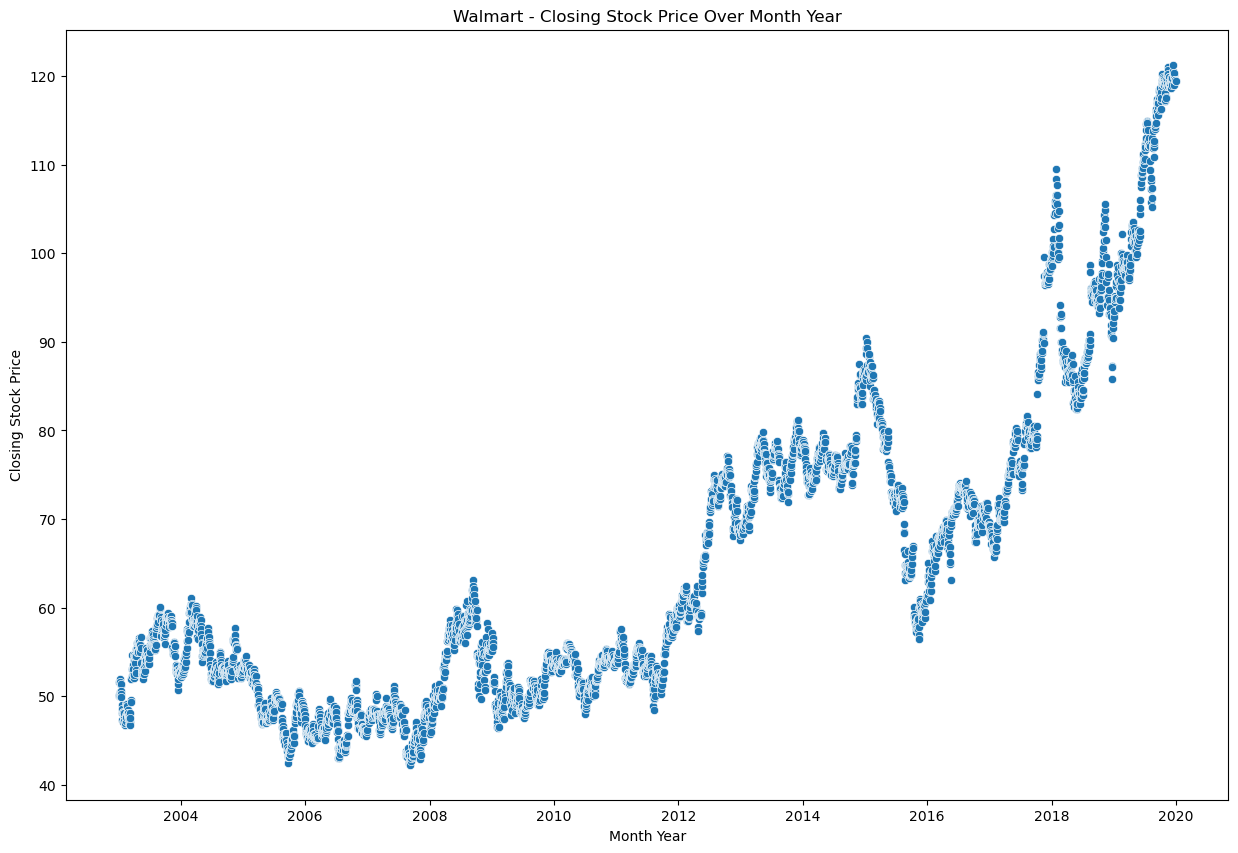

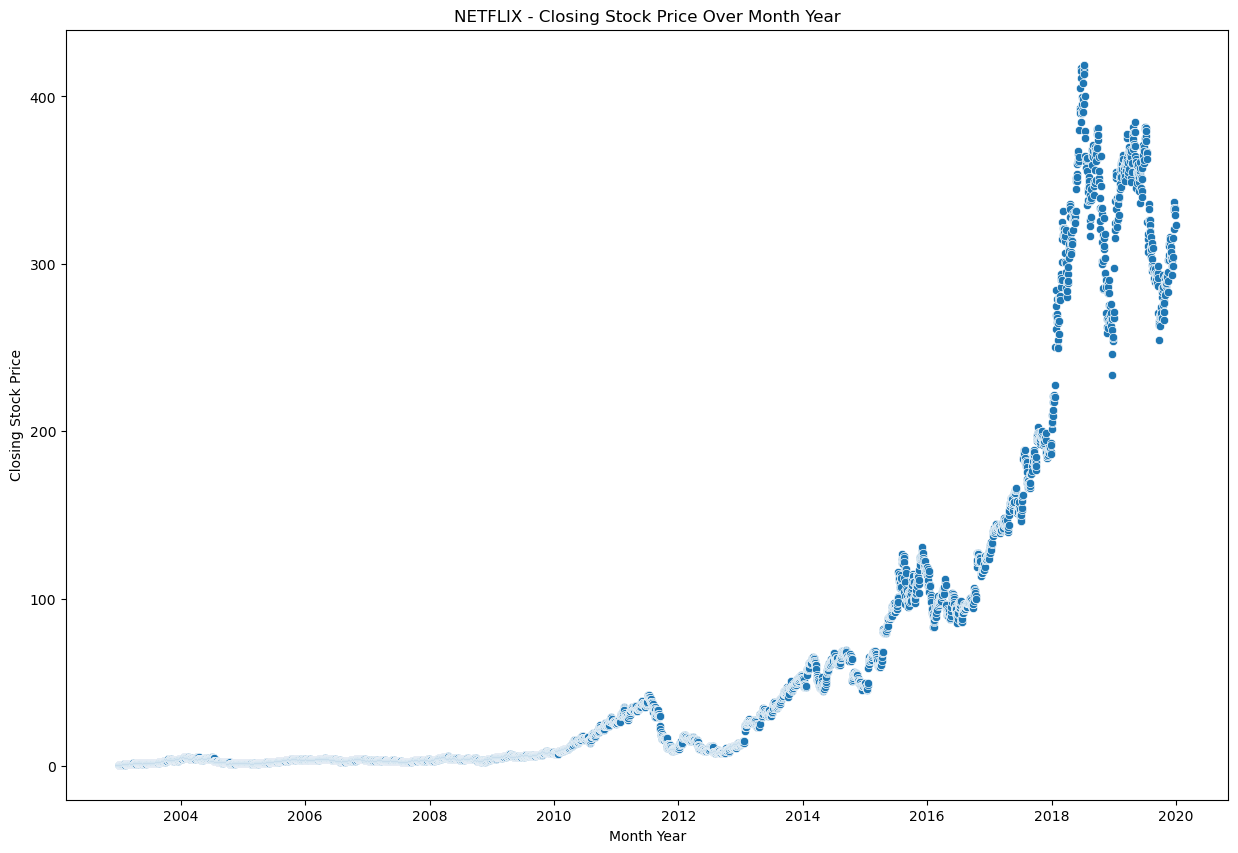

In [8]:
## WALMART - CLOSE price trend over the years
fig = plt.figure(figsize = (15,10))
ax = sns.scatterplot(x = 'Date', y = 'Close', data = df_WMT)
plt.title('Walmart - Closing Stock Price Over Month Year')
plt.xlabel('Month Year')
plt.ylabel('Closing Stock Price')
plt.show()

## NETFLIX - CLOSE price trend over the years
fig = plt.figure(figsize = (15,10))
ax = sns.scatterplot(x = 'Date', y = 'Close', data = df_NFLX)
plt.title('NETFLIX - Closing Stock Price Over Month Year')
plt.xlabel('Month Year')
plt.ylabel('Closing Stock Price')
plt.show()

## Feature Engineering

In [9]:
def feature_engineering(df):
    ## date features
    def create_date_features(df):
        df['Month'] = df['Date'].apply(lambda x: x.month) ## month (integer)
        df['Year'] = df['Date'].apply(lambda x: x.year) ## year (integer)
        df['Month Year'] = df['Date'].apply(lambda x: x.strftime('%b %Y')) ## month year as string
        df['Quarter End Month'] = df['Month'].apply(lambda x: 1 if x%3 == 0 else 0) ## binary
        return df
    ## price movement features
    def create_price_movement(df):
        ## Price Differences
        df['Diff 1'] = df['Close'].diff(1) # $ price diff from yesterday
        df['Diff 5'] = df['Close'].diff(5) # $ price diff from 5 days ago
        df['Diff 20'] = df['Close'].diff(20) # price diff from 20 days ago
        
        ## Previous Prices
        df['Lag 1'] = df['Close'].shift(1) # 1 business day
        df['Lag 5'] = df['Close'].shift(5) # 5 business days = 1 week
        df['Lag 20'] = df['Close'].shift(20) # 5 business days * 4 weeks = 20 days (month)
        
        ### Percent Change - Change from Previous Price to Current Price
        df['Prev Percent Change 1'] = df['Lag 1'].pct_change()*100 ## Yesterday's Price Change from its Previous
        df['Percent Change 1'] = df['Close'].pct_change()*100 ## % Change from Yesterday
        df['Percent Change 5'] = df['Close'].pct_change(5)*100 ## % Change from Price 5 days ago to today
        df['Percent Change 20'] = df['Close'].pct_change(20)*100 # % Price Change from 20 days ago
        df['Percent Change 60'] = df['Close'].pct_change(60)*100 ## % Quarterly Price Change from 60 days ago
        
        ## High
        df['High 20 Days'] = df.rolling(20).mean()['High'] ## The average high price moving 20 days

        
        ## Open 
        df['Open-PrevClose'] = df['Open'] - df['Lag 1'] ## From Previous Closing Price to Open Price
        df['Close-Open Price'] = df['Close'] - df['Open'] ## Range from Open Price to Close Price on Same Day
        df['Close-Open % Change'] = ((df['Close'] - df['Open'])/df['Open'])*100 #% Change from Open to Close
        df['Prev (Close-Open) % Change'] = df['Close-Open % Change'].shift(1) # Yesterday's (% Change from Open to Close)
        df['Open-Lag1 % Change'] = ((df['Open'] - df['Lag 1'])/df['Lag 1'])*100 # % Change from Previous Close to Open
        
        ## Moving Averages
        df['MA 5 days'] = df.rolling(5, closed = 'left').mean()['Close'] ## Moving Average 5 days
        df['MA 20 days'] = df.rolling(20, closed = 'left').mean()['Close'] ## Moving Average 20 days
        df['MA 50 days'] = df.rolling(50, closed = 'left').mean()['Close'] ## Moving Average 50 days
        df['MA 200 days'] = df.rolling(200, closed = 'left').mean()['Close'] ## Moving Average 200 day
        
        ## Moving Averages Ratio to Close (How Close is Closing Price to Moving Average)
        df['MA5/Close'] = df['MA 5 days']/df['Close']
        df['MA20/Close'] = df['MA 20 days']/df['Close']
        
        ### Direction of the Market
        df['Target'] = np.where(df['Close'].shift(1) < df['Close'], 1, 0) ## stock direction end of day
        df["Target tomorrow"] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0) ## direction for tomorrow (1 day + 1)
        df['Target 4 days'] = np.where(df['Close'].shift(5) < df['Close'], 1, 0) ## direction for 5 days from now
        df['Target 20 days'] = np.where(df['Close'].shift(21) < df['Close'], 1, 0)## direction for 20 days from now
        return df
    df = create_date_features(df)
    df = create_price_movement(df)
    return df
df_WMT = feature_engineering(df_WMT)
df_NFLX = feature_engineering(df_NFLX)
df_NFLX[['Date', 'Close', 'Diff 1', 'Lag 1','MA 5 days', 'MA 20 days', 'Percent Change 1', 'Target', "Target tomorrow"]]

,Date,Close,Diff 1,Lag 1,MA 5 days,MA 20 days,Percent Change 1,Target,Target tomorrow
0,2003-01-02,0.817857,NaN,NaN,NaN,NaN,NaN,0,0
1,2003-01-03,0.772857,-0.045000,0.817857,NaN,NaN,-5.502184,0,1
2,2003-01-06,0.792857,0.020000,0.772857,NaN,NaN,2.587801,1,0
3,2003-01-07,0.783571,-0.009286,0.792857,NaN,NaN,-1.171207,0,1
4,2003-01-08,0.815000,0.031429,0.783571,NaN,NaN,4.010996,1,1
...,...,...,...,...,...,...,...,...,...
4273,2019-12-23,333.100006,-3.799988,336.899994,321.921997,310.044498,-1.127928,0,1
4274,2019-12-24,333.200012,0.100006,333.100006,327.700000,311.175497,0.030023,1,0
4275,2019-12-26,332.630005,-0.570007,333.200012,331.244000,312.057999,-0.171071,0,0
4276,2019-12-27,329.089996,-3.540009,332.630005,333.610004,313.064999,-1.064248,0,0


In [10]:
## descriptive statistics of selected variables in WMT
df_WMT[['Open', 'Close', 'Low', 'High', 
        'Diff 1', 
        'Lag 1',
        'Percent Change 1', 
        'Close-Open Price',
       'Close-Open % Change',
        'Prev (Close-Open) % Change',
       'MA 5 days']].describe()

,Open,Close,Low,High,Diff 1,Lag 1,Percent Change 1,Close-Open Price,Close-Open % Change,Prev (Close-Open) % Change,MA 5 days
count,4278.000000,4278.000000,4278.000000,4278.000000,4277.000000,4277.000000,4277.000000,4278.000000,4278.000000,4277.000000,4273.000000
mean,65.034025,65.047866,64.554313,65.541555,0.015852,65.035158,0.026979,0.013841,0.023735,0.023819,65.016365
std,17.639709,17.643708,17.553403,17.725087,0.794678,17.626180,1.214633,0.659283,1.030830,1.030936,17.578929
min,42.389999,42.270000,42.090000,42.680000,-10.669998,42.270000,-10.183239,-6.580002,-9.878399,-9.878399,42.561999
25%,51.410000,51.400002,50.927499,51.849998,-0.360001,51.400002,-0.586474,-0.320000,-0.514111,-0.514274,51.430000
50%,58.299999,58.330000,57.769998,58.799999,0.020004,58.320000,0.037602,0.010001,0.016186,0.017239,58.335999
75%,75.557499,75.597498,75.164999,75.947498,0.399997,75.589996,0.632676,0.360001,0.564515,0.564582,75.580000
max,124.599998,121.279999,120.699997,125.379997,9.790001,121.279999,11.073083,4.500000,8.303885,8.303885,120.410001


In [11]:
## descriptive statistics of selected variables in NFLX
df_NFLX[['Open', 'Close', 'Low', 'High', 
        'Diff 1', 
        'Lag 1',
        'Percent Change 1', 
        'Close-Open Price',
       'Close-Open % Change',
        'Prev (Close-Open) % Change',
       'MA 5 days']].describe()

,Open,Close,Low,High,Diff 1,Lag 1,Percent Change 1,Close-Open Price,Close-Open % Change,Prev (Close-Open) % Change,MA 5 days
count,4278.000000,4278.000000,4278.000000,4278.000000,4277.000000,4277.000000,4277.000000,4278.000000,4278.000000,4277.000000,4273.000000
mean,69.410201,69.415707,68.281643,70.464271,0.075401,69.356344,0.200889,0.005506,0.104866,0.105300,69.265795
std,104.268124,104.232000,102.580119,105.765058,3.107791,104.171838,3.473922,2.645053,2.751276,2.751451,104.017185
min,0.771429,0.772857,0.762143,0.795714,-37.230011,0.772857,-40.906466,-30.450012,-16.841991,-16.841991,0.796428
25%,3.907500,3.910000,3.842322,3.984643,-0.204285,3.910000,-1.379145,-0.214286,-1.357367,-1.357027,3.909143
50%,15.432143,15.395000,15.046429,15.760714,0.002857,15.385714,0.035815,-0.003928,-0.054432,-0.054071,15.369428
75%,94.775002,94.400004,93.267498,95.609286,0.240000,94.370003,1.715436,0.208572,1.522232,1.522802,94.427429
max,421.380005,418.970001,413.079987,423.209991,28.279999,418.970001,42.223509,32.529999,19.319378,19.319378,415.000000


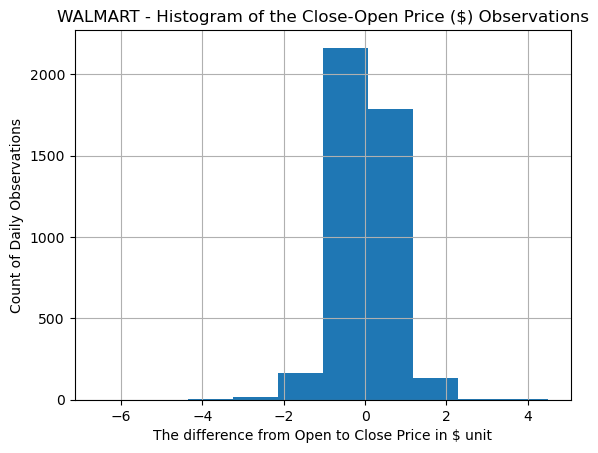

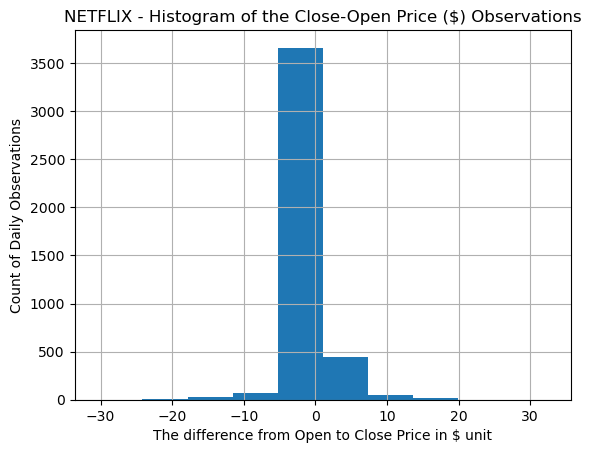

In [12]:
### WALMART - CLOSE OPEN PRICE HISTOGRAM
df_WMT['Close-Open Price'].hist()
plt.title('WALMART - Histogram of the Close-Open Price ($) Observations')
plt.ylabel('Count of Daily Observations')
plt.xlabel('The difference from Open to Close Price in $ unit')
plt.show()

### NETFLIX - CLOSE OPEN PRICE HISTOGRAM
df_NFLX['Close-Open Price'].hist()
plt.title('NETFLIX - Histogram of the Close-Open Price ($) Observations')
plt.ylabel('Count of Daily Observations')
plt.xlabel('The difference from Open to Close Price in $ unit')
plt.show()

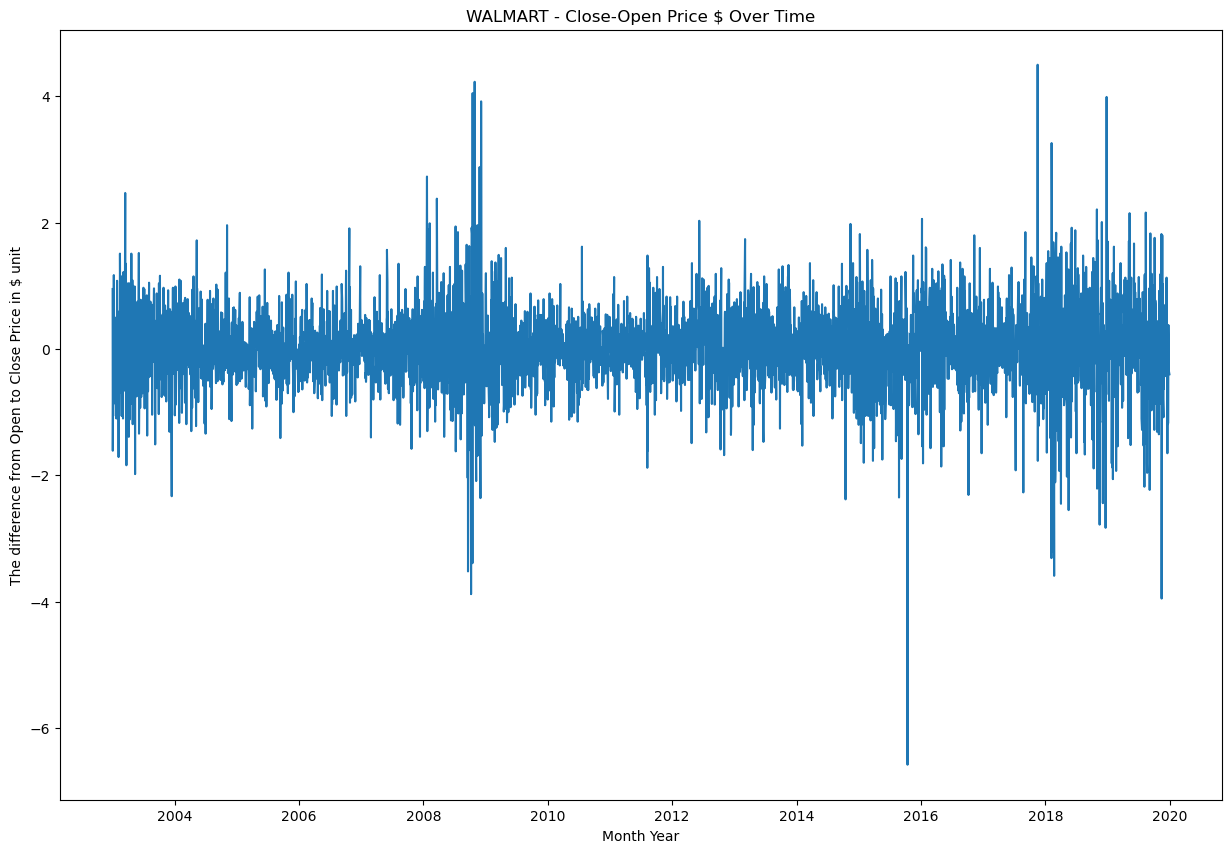

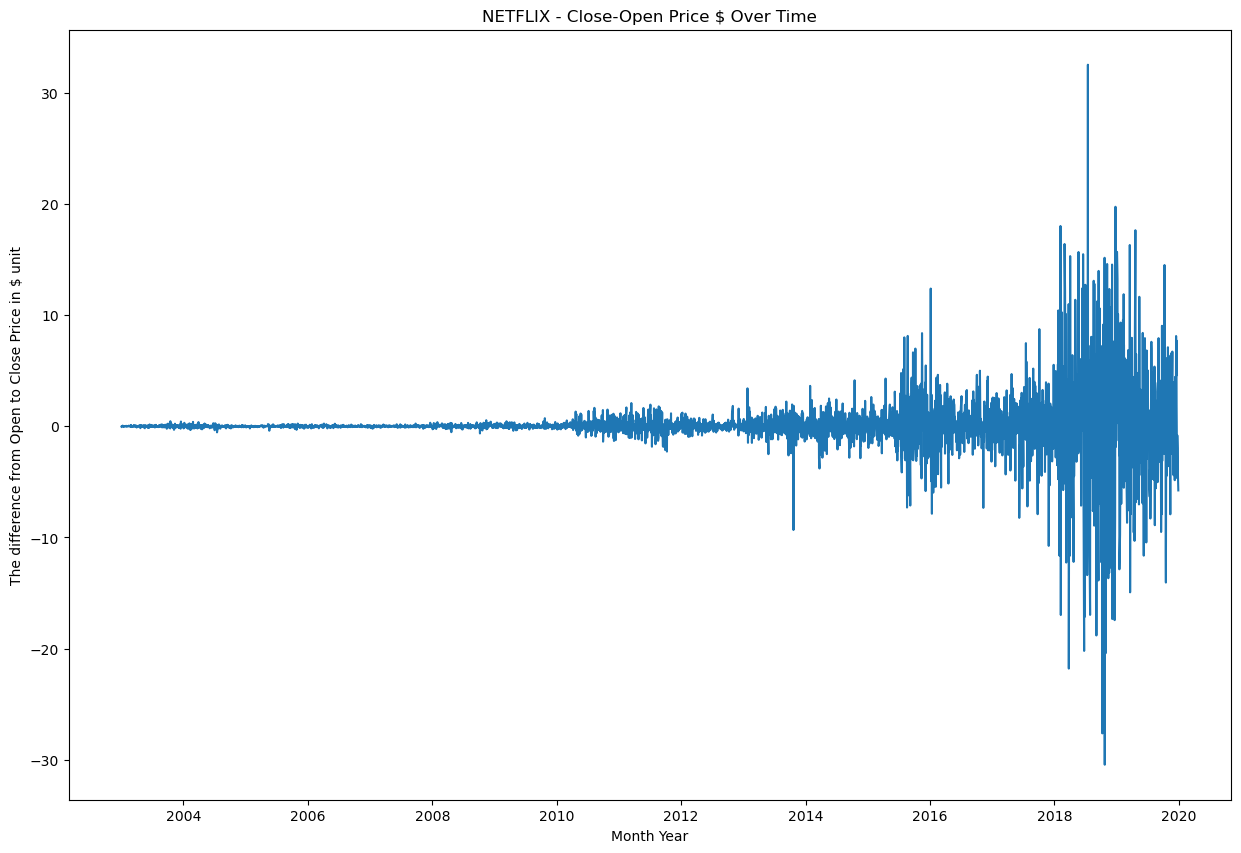

In [13]:
## WALMART - CLOSE-OPEN PRICE $ OVER TIME
fig = plt.figure(figsize = (15,10))
ax = sns.lineplot(x = 'Date', y = 'Close-Open Price', data = df_WMT)
plt.title('WALMART - Close-Open Price $ Over Time')
plt.xlabel('Month Year')
plt.ylabel('The difference from Open to Close Price in $ unit')
plt.show()

## NETFLIX - CLOSE-OPEN PRICE $ OVER TIME
fig = plt.figure(figsize = (15,10))
ax = sns.lineplot(x = 'Date', y = 'Close-Open Price', data = df_NFLX)
plt.title('NETFLIX - Close-Open Price $ Over Time')
plt.xlabel('Month Year')
plt.ylabel('The difference from Open to Close Price in $ unit')
plt.show()



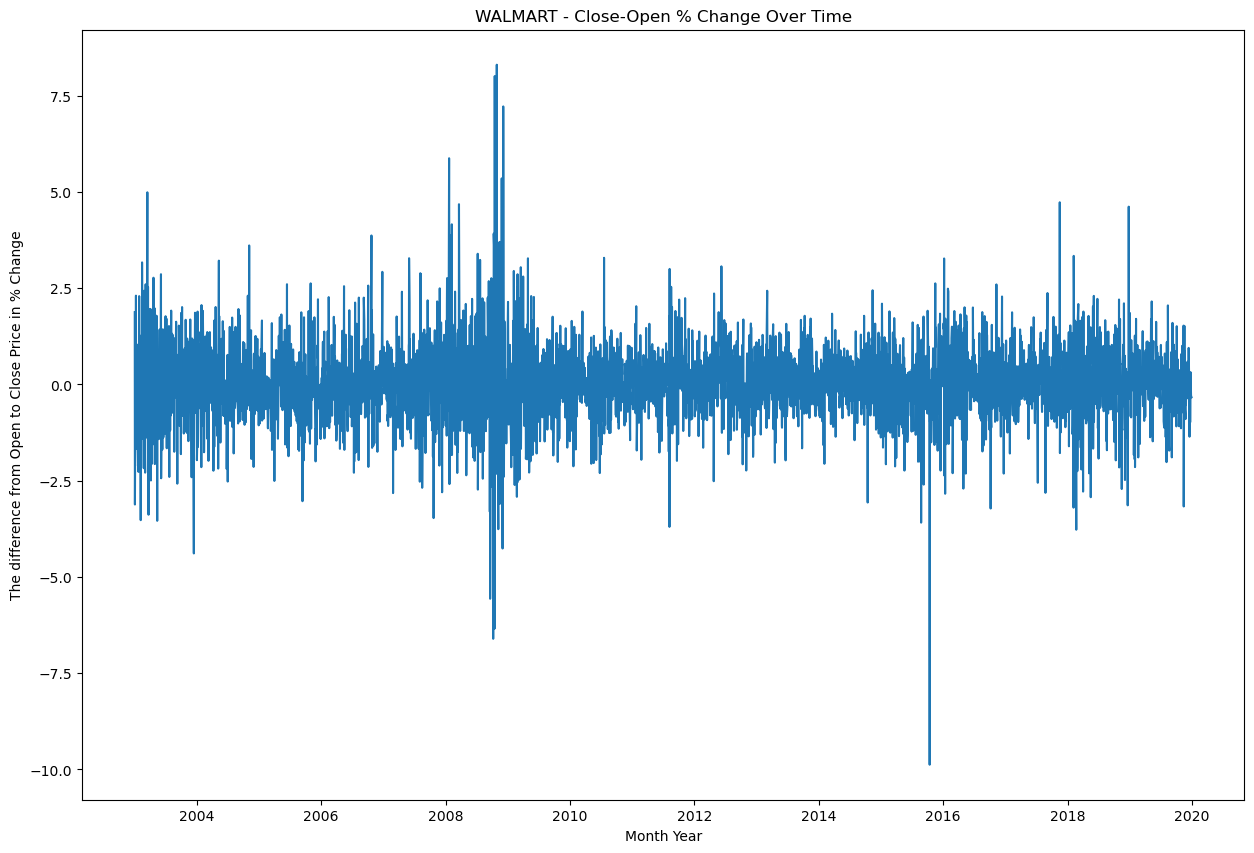

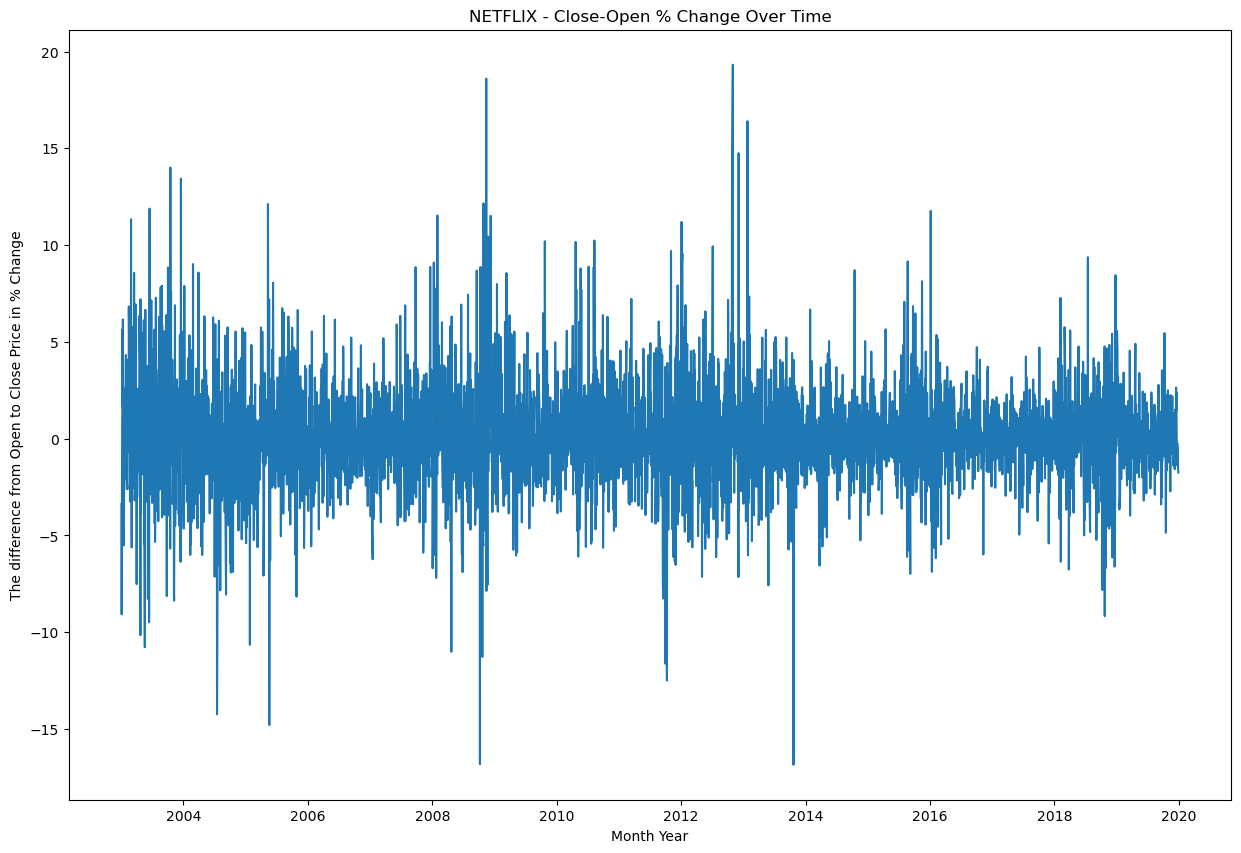

In [14]:
## WALMART - CLOSE-OPEN PRICE % Change OVER TIME
fig = plt.figure(figsize = (15,10))
ax = sns.lineplot(x = 'Date', y = 'Close-Open % Change', data = df_WMT)
plt.title('WALMART - Close-Open % Change Over Time')
plt.xlabel('Month Year')
plt.ylabel('The difference from Open to Close Price in % Change')
plt.show()

## NETFLIX - CLOSE-OPEN PRICE % Change OVER TIME
fig = plt.figure(figsize = (15,10))
ax = sns.lineplot(x = 'Date', y = 'Close-Open % Change', data = df_NFLX)
plt.title('NETFLIX - Close-Open % Change Over Time')
plt.xlabel('Month Year')
plt.ylabel('The difference from Open to Close Price in % Change')
plt.show()

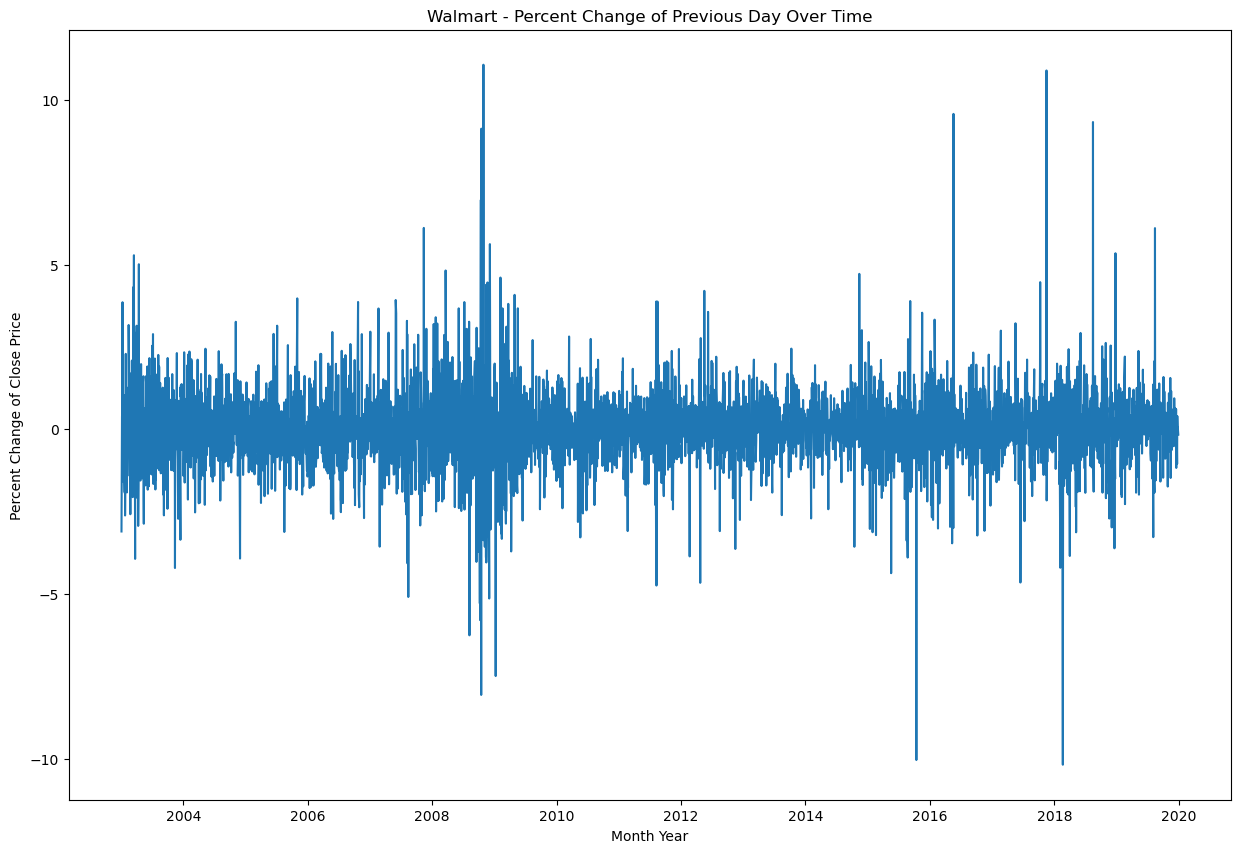

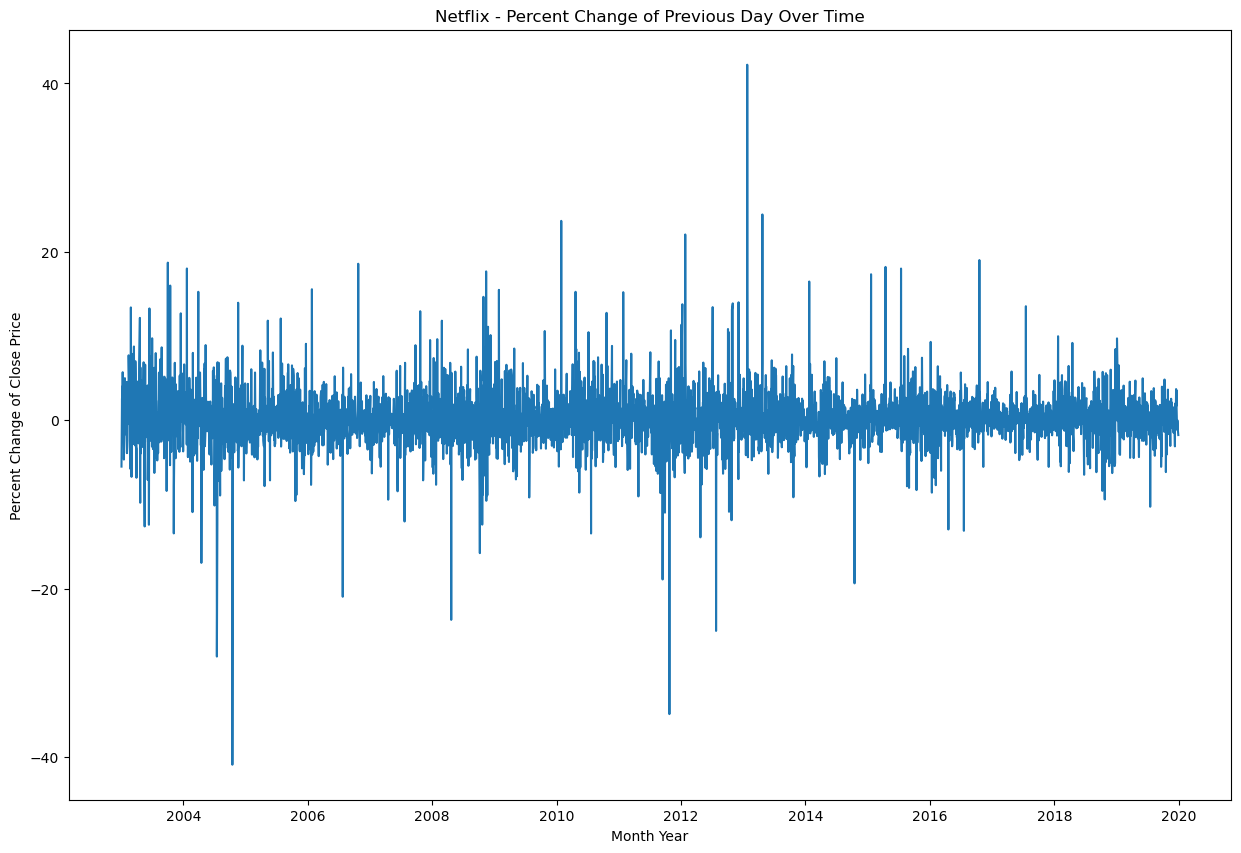

In [15]:
## WALMART - Percent Change of Previous Day over Time from 2003-2019
fig = plt.figure(figsize = (15,10))
ax = sns.lineplot(x = 'Date', y = 'Percent Change 1', data = df_WMT)
plt.title('Walmart - Percent Change of Previous Day Over Time')
plt.xlabel('Month Year')
plt.ylabel('Percent Change of Close Price')
plt.show()

## NETFLIX - Percent Change of Previous Day over Time from 2003-2019
fig = plt.figure(figsize = (15,10))
ax = sns.lineplot(x = 'Date', y = 'Percent Change 1', data = df_NFLX)
plt.title('Netflix - Percent Change of Previous Day Over Time')
plt.xlabel('Month Year')
plt.ylabel('Percent Change of Close Price')
plt.show()

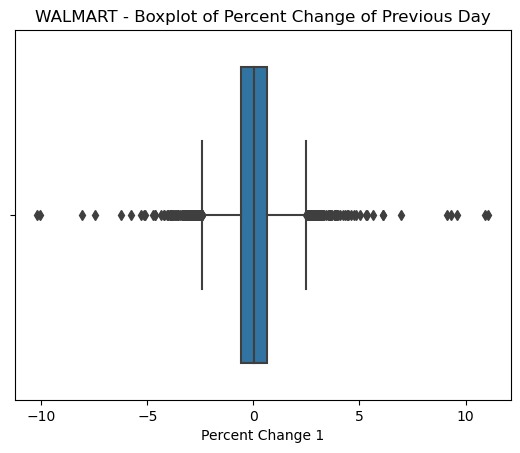

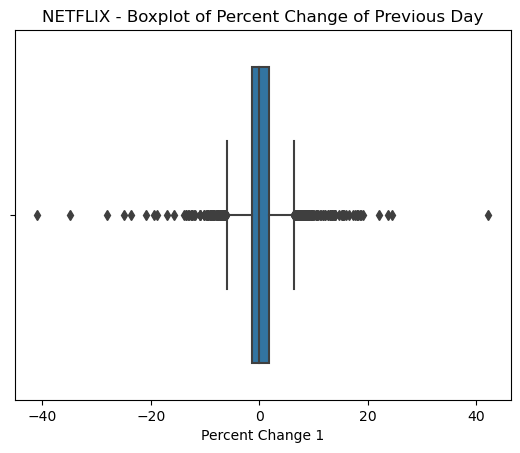

In [16]:
## BOXPLOT OF PERCENT CHANGE 
## WALMART
sns.boxplot(x = df_WMT['Percent Change 1'])
plt.title('WALMART - Boxplot of Percent Change of Previous Day')
plt.show()
## NETFLIX
sns.boxplot(x = df_NFLX['Percent Change 1'])
plt.title('NETFLIX - Boxplot of Percent Change of Previous Day')
plt.show()

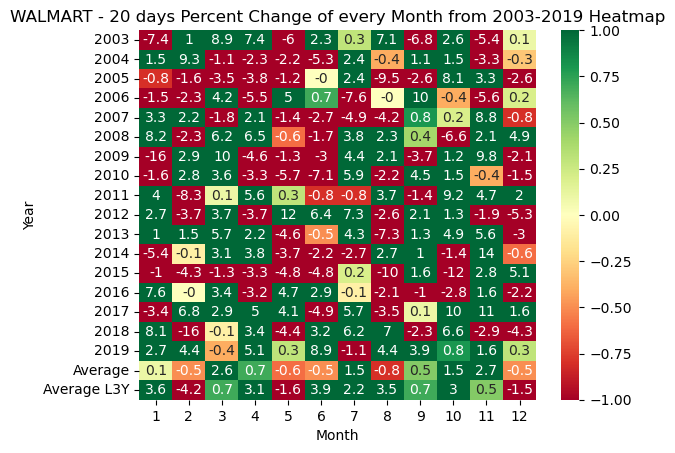

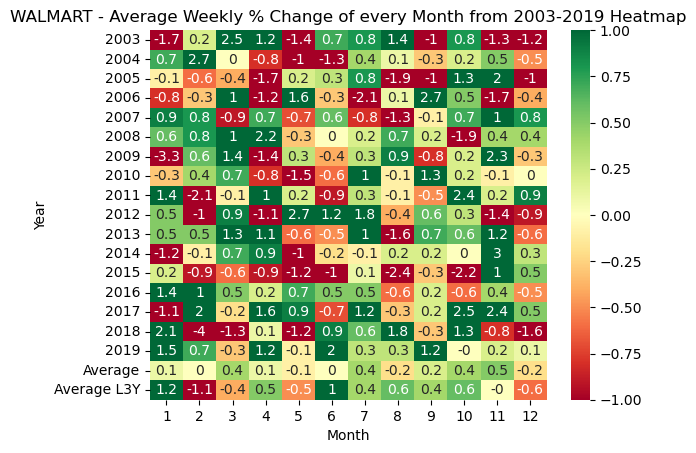

In [17]:
########################### WALMART HEATMAPS OVER TIME BY YEAR #############################
### CLOSING PRICE 20 days % Change at end of Month from 2003-2019 Heatmap 
closeprice_monthyear_endofmonth = df_WMT.groupby(['Year', 'Month']).last().sort_index().reset_index().pivot(
    index = 'Year', columns = 'Month', values = 'Percent Change 20').round(1)
closeprice_monthyear_endofmonth.loc['Average'] = closeprice_monthyear_endofmonth.mean(axis = 0).round(1)
closeprice_monthyear_endofmonth.loc['Average L3Y'] = closeprice_monthyear_endofmonth.iloc[-3:].mean(axis = 0).round(1)
sns.heatmap(closeprice_monthyear_endofmonth, cmap = 'RdYlGn', vmin = -1, vmax = 1, annot = True)
plt.title('WALMART - 20 days Percent Change of every Month from 2003-2019 Heatmap')
plt.show()

### CLOSING PRICE % Change every 5 days of every Month from 2003-2019 
closeprice_monthyear_5days = df_WMT.groupby(['Year', 'Month']).mean().sort_index().reset_index().pivot(
    index = 'Year', columns = 'Month', values = 'Percent Change 5').round(1)
closeprice_monthyear_5days.loc['Average'] = closeprice_monthyear_5days.mean(axis = 0).round(1)
closeprice_monthyear_5days.loc['Average L3Y'] = closeprice_monthyear_5days.iloc[-3:].mean(axis = 0).round(1)
sns.heatmap(closeprice_monthyear_5days, cmap = 'RdYlGn', vmin = -1, vmax = 1, annot = True)
plt.title('WALMART - Average Weekly % Change of every Month from 2003-2019 Heatmap')
plt.show()

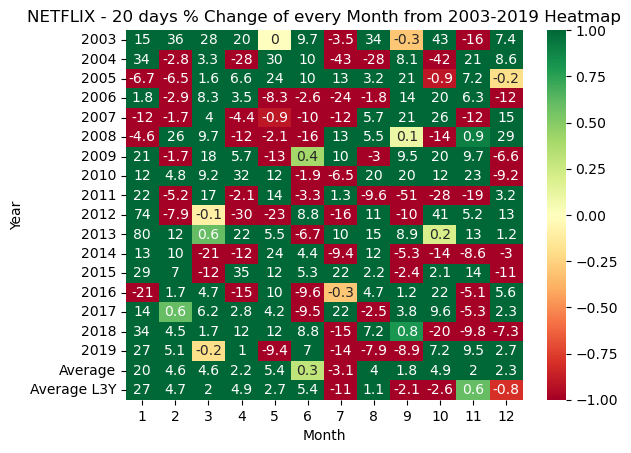

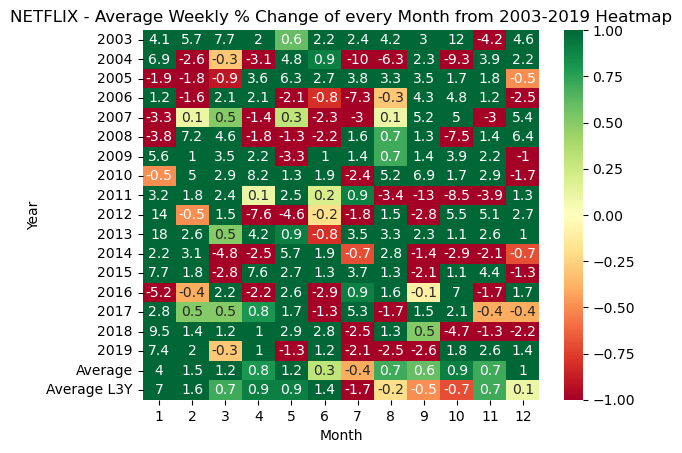

In [18]:
############################ NETFLIX HEATMAPS OVER TIME BY YEAR #########################3
### CLOSING PRICE 20 days % Change at end of Month from 2003-2019 Heatmap 
closeprice_monthyear_endofmonth = df_NFLX.groupby(['Year', 'Month']).last().sort_index().reset_index().pivot(
    index = 'Year', columns = 'Month', values = 'Percent Change 20').round(1)
closeprice_monthyear_endofmonth.loc['Average'] = closeprice_monthyear_endofmonth.mean(axis = 0).round(1)
closeprice_monthyear_endofmonth.loc['Average L3Y'] = closeprice_monthyear_endofmonth.iloc[-3:].mean(axis = 0).round(1)
sns.heatmap(closeprice_monthyear_endofmonth, cmap = 'RdYlGn', vmin = -1, vmax = 1, annot = True)
plt.title('NETFLIX - 20 days % Change of every Month from 2003-2019 Heatmap')
plt.show()

### CLOSING PRICE % Change every 5 days of every Month from 2003-2019 
closeprice_monthyear_5days = df_NFLX.groupby(['Year', 'Month']).mean().sort_index().reset_index().pivot(
    index = 'Year', columns = 'Month', values = 'Percent Change 5').round(1)
closeprice_monthyear_5days.loc['Average'] = closeprice_monthyear_5days.mean(axis = 0).round(1)
closeprice_monthyear_5days.loc['Average L3Y'] = closeprice_monthyear_5days.iloc[-3:].mean(axis = 0).round(1)
sns.heatmap(closeprice_monthyear_5days, cmap = 'RdYlGn', vmin = -1, vmax = 1, annot = True)
plt.title('NETFLIX - Average Weekly % Change of every Month from 2003-2019 Heatmap')
plt.show()

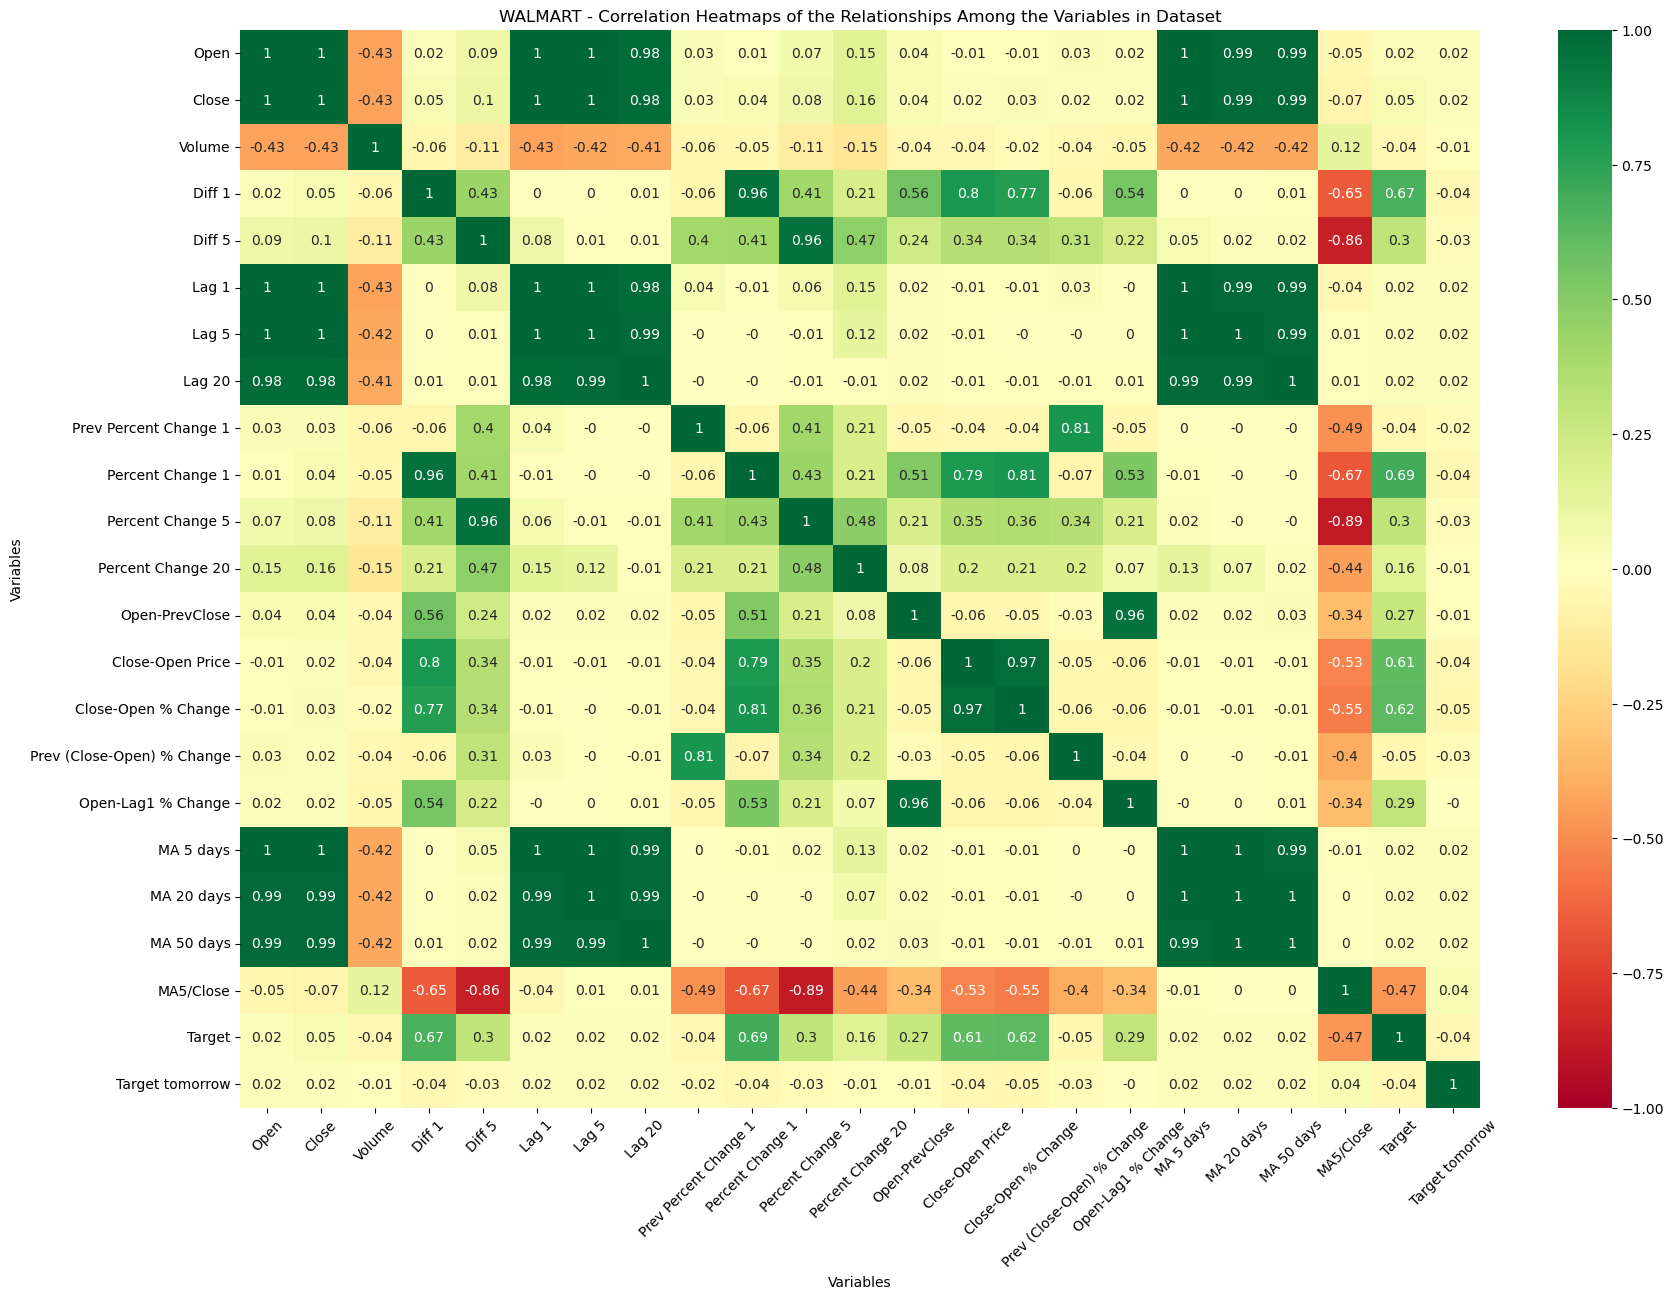

In [19]:
## WALMART - VARIABLE HEATMAP CORRELATION
fig = plt.figure(figsize = (20, 14))
sns.heatmap(df_WMT.drop(columns = ['MA 200 days', 'Target 4 days', 'Target 20 days', 
                                   'High 20 Days', 'High', 'Low', 'Adj Close',
                                   'Percent Change 60', 'Month', 'Year',
                                   'MA20/Close',
                                   'Quarter End Month', 'Diff 20']).corr().round(2),
            cmap = 'RdYlGn',
            annot = True,
           vmin = -1, vmax = 1)
plt.title('WALMART - Correlation Heatmaps of the Relationships Among the Variables in Dataset')
plt.xlabel('Variables')
plt.xticks(rotation = 45)
plt.ylabel('Variables')
plt.show()

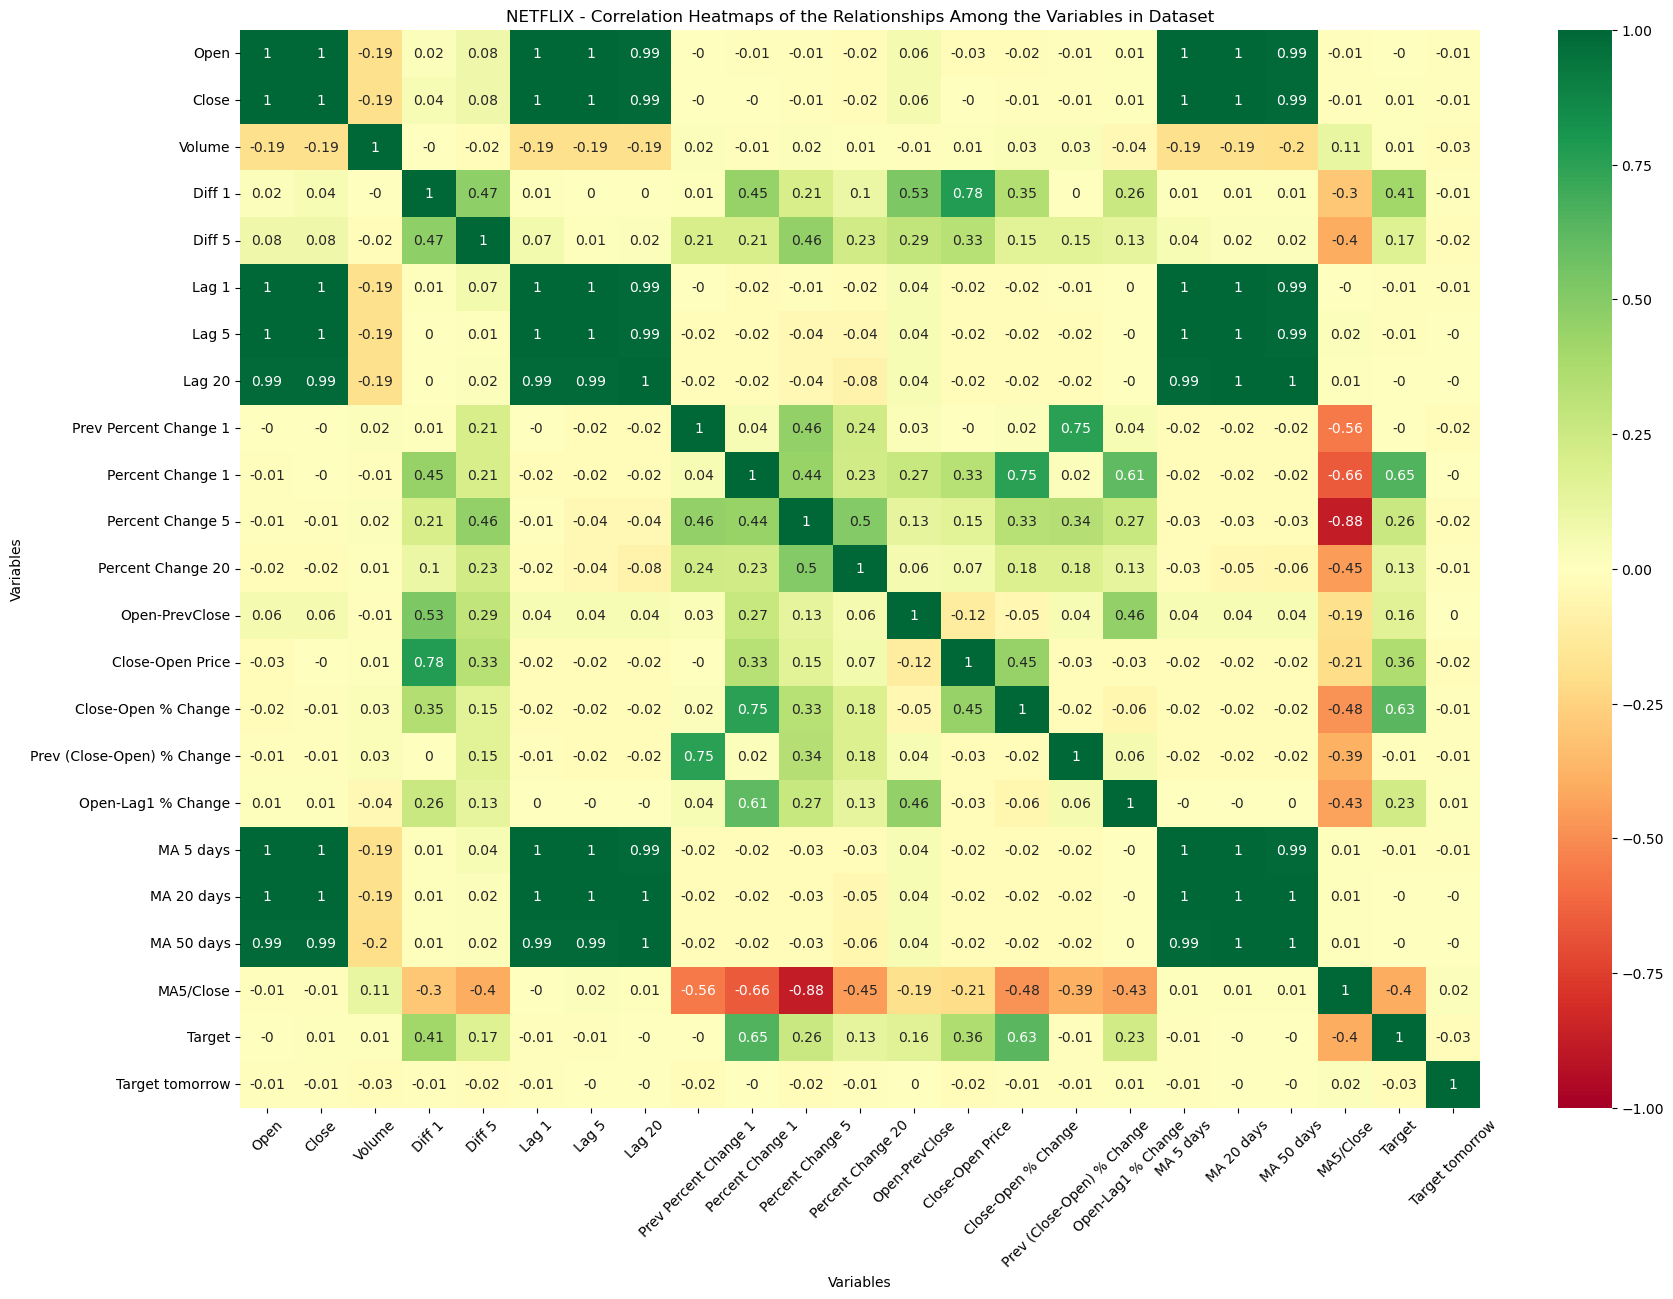

In [20]:
## NETFLIX - VARIABLE CORRELATION HEATMAP
fig = plt.figure(figsize = (20, 14))
sns.heatmap(df_NFLX.drop(columns = ['MA 200 days', 'Target 4 days', 'Target 20 days', 
                                   'High 20 Days', 'High', 'Low', 'Adj Close',
                                   'Percent Change 60', 'Month', 'Year',
                                   'MA20/Close',
                                   'Quarter End Month', 'Diff 20']).corr().round(2),
            cmap = 'RdYlGn',
            annot = True,
           vmin = -1, vmax = 1)
plt.title('NETFLIX - Correlation Heatmaps of the Relationships Among the Variables in Dataset')
plt.xlabel('Variables')
plt.xticks(rotation = 45)
plt.ylabel('Variables')
plt.show()

## PART B - Regression Model Building
Predicting the Stock Price

In [21]:
## model preparation for training and testing dataset for time series data
def create_training_test(X, Y, test_size):
    ## divide into training set and test
    ## skip the first 20 rows because of 20 days change metrics
    x_training_set = X.iloc[20:-test_size, :]
    x_test_set = X.iloc[-test_size:, :]
    
    y_training_set = Y.iloc[20:-test_size]
    y_test_set = Y.iloc[-test_size:]
    return x_training_set, x_test_set, y_training_set, y_test_set 

In [22]:
####################### linear Regression 1 for WALMART  ######################

X_reg_WMT = df_WMT.set_index('Date')[['Open']]
y_reg_WMT = df_WMT.set_index('Date')['Close']

X_train_reg_WMT, X_test_reg_WMT, Y_train_reg_WMT, Y_test_reg_WMT = create_training_test(X_reg_WMT, y_reg_WMT, 120)

linear_model = LinearRegression()
linear_model.fit(X_train_reg_WMT, Y_train_reg_WMT)

WMT_lm_predictions = linear_model.predict(X_test_reg_WMT)
print('############## WALMART - Linear Regression f(Open) = Close ###################')
print('Coefficients:', linear_model.coef_,)
print('Intercept:', linear_model.intercept_)

print('R2 Score:', r2_score(Y_test_reg_WMT, WMT_lm_predictions))
print('MSE:', mean_squared_error(Y_test_reg_WMT, WMT_lm_predictions))

WMT_reg_predictions_df = pd.DataFrame()
WMT_reg_predictions_df['Date'] = Y_test_reg_WMT.index
WMT_reg_predictions_df['Actual Close Price'] = Y_test_reg_WMT.values
WMT_reg_predictions_df['WMT LinearReg Model 1'] = WMT_lm_predictions


#################### linear Regression 2 for WALMART  #######################

X_reg_WMT = df_WMT.set_index('Date')[['Lag 1']] ## Previous Close
y_reg_WMT = df_WMT.set_index('Date')['Close']

X_train_reg_WMT, X_test_reg_WMT, Y_train_reg_WMT, Y_test_reg_WMT = create_training_test(X_reg_WMT, y_reg_WMT, 120)

linear_model = LinearRegression()
linear_model.fit(X_train_reg_WMT, Y_train_reg_WMT)

WMT_lm_predictions = linear_model.predict(X_test_reg_WMT)
print('############## WALMART - Linear Regression f(Lag 1) = Close ###################')
print('Coefficients:', linear_model.coef_,)
print('Intercept:', linear_model.intercept_)

print('R2 Score:', r2_score(Y_test_reg_WMT, WMT_lm_predictions))
print('MSE:', mean_squared_error(Y_test_reg_WMT, WMT_lm_predictions))

WMT_reg_predictions_df['WMT LinearReg Model 2'] = WMT_lm_predictions

############### linear Regression 3 for WALMART ########################

X_reg_WMT = df_WMT.set_index('Date')[['Percent Change 1', 'Percent Change 5', 'Percent Change 20', 'MA 5 days']] ## Previous Close
y_reg_WMT = df_WMT.set_index('Date')['Close']

X_train_reg_WMT, X_test_reg_WMT, Y_train_reg_WMT, Y_test_reg_WMT = create_training_test(X_reg_WMT, y_reg_WMT, 120)

linear_model = LinearRegression()
linear_model.fit(X_train_reg_WMT, Y_train_reg_WMT)

WMT_lm_predictions = linear_model.predict(X_test_reg_WMT)
print('############## WALMART - Linear Regression f(Percent Change 1, 5, 20, MA 5 days) = Close ###################')
print('Coefficients:', linear_model.coef_,)
print('Intercept:', linear_model.intercept_)

print('R2 Score:', r2_score(Y_test_reg_WMT, WMT_lm_predictions))
print('MSE:', mean_squared_error(Y_test_reg_WMT, WMT_lm_predictions))

WMT_reg_predictions_df['WMT LinearReg Model 3'] = WMT_lm_predictions


############### linear Regression 4 for WALMART ########################

X_reg_WMT = df_WMT.set_index('Date')[['Percent Change 1', 'Percent Change 5', 'Percent Change 20']] ## Previous Close
y_reg_WMT = df_WMT.set_index('Date')['Close']

X_train_reg_WMT, X_test_reg_WMT, Y_train_reg_WMT, Y_test_reg_WMT = create_training_test(X_reg_WMT, y_reg_WMT, 120)

linear_model = LinearRegression()
linear_model.fit(X_train_reg_WMT, Y_train_reg_WMT)

WMT_lm_predictions = linear_model.predict(X_test_reg_WMT)
print('############## WALMART - Linear Regression f(Percent Change 1, 5, 20) = Close ###################')
print('Coefficients:', linear_model.coef_,)
print('Intercept:', linear_model.intercept_)

print('R2 Score:', r2_score(Y_test_reg_WMT, WMT_lm_predictions))
print('MSE:', mean_squared_error(Y_test_reg_WMT, WMT_lm_predictions))

WMT_reg_predictions_df['WMT LinearReg Model 4'] = WMT_lm_predictions

## Predictions of CLOSING PRICE DF
WMT_reg_predictions_df

############## WALMART - Linear Regression f(Open) = Close ###################
Coefficients: [1.00036167]
Intercept: -0.003640116454029396
R2 Score: 0.9379342015282347
MSE: 0.9024501318602318
############## WALMART - Linear Regression f(Lag 1) = Close ###################
Coefficients: [0.9998152]
Intercept: 0.02756358987026175
R2 Score: 0.9195170502692522
MSE: 1.1702394939792016
############## WALMART - Linear Regression f(Percent Change 1, 5, 20, MA 5 days) = Close ###################
Coefficients: [0.3025312  0.30939583 0.00577539 1.00061909]
Intercept: -0.04571289645550536
R2 Score: 0.9615480815768636
MSE: 0.5590992093177434
############## WALMART - Linear Regression f(Percent Change 1, 5, 20) = Close ###################
Coefficients: [0.0089781  0.01611054 0.54319048]
Intercept: 63.358533487887094
R2 Score: -187.97655854623062
MSE: 2747.760028514268


,Date,Actual Close Price,WMT LinearReg Model 1,WMT LinearReg Model 2,WMT LinearReg Model 3,WMT LinearReg Model 4
0,2019-07-11,113.919998,113.377347,112.986688,113.319490,65.934689
1,2019-07-12,114.599998,114.127618,113.926509,113.856285,66.376258
2,2019-07-15,114.980003,114.707830,114.606384,114.196444,66.337112
3,2019-07-16,114.760002,115.368073,114.986318,114.383822,66.170259
4,2019-07-17,114.599998,114.847881,114.766358,114.700545,65.832540
...,...,...,...,...,...,...
115,2019-12-23,119.029999,120.239829,120.295335,119.732764,63.178768
116,2019-12-24,119.510002,119.169442,119.035566,119.809968,63.608138
117,2019-12-26,119.519997,119.649620,119.515480,119.698790,63.504429
118,2019-12-27,119.589996,119.979740,119.525473,119.609884,63.732112


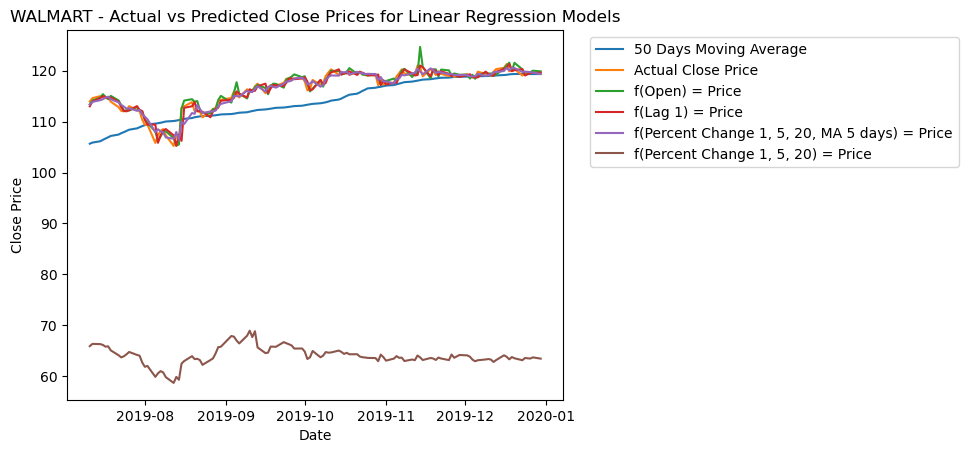

In [23]:
### WALMART - PLOT OF THE ACTUAL VS PREDICTED CLOSE PRICES FOR THE LINEAR REGRESSION MODELS
sns.lineplot(x = 'Date', y = 'MA 50 days', data = df_WMT.iloc[-120:])
sns.lineplot(x = 'Date', y = 'Actual Close Price', data = WMT_reg_predictions_df)
sns.lineplot(x = 'Date', y = 'WMT LinearReg Model 1', data = WMT_reg_predictions_df)
sns.lineplot(x = 'Date', y = 'WMT LinearReg Model 2', data = WMT_reg_predictions_df)
sns.lineplot(x = 'Date', y = 'WMT LinearReg Model 3', data = WMT_reg_predictions_df)
sns.lineplot(x = 'Date', y = 'WMT LinearReg Model 4', data = WMT_reg_predictions_df)
plt.legend(['50 Days Moving Average',
            'Actual Close Price',
        'f(Open) = Price', 
        'f(Lag 1) = Price', 
        'f(Percent Change 1, 5, 20, MA 5 days) = Price',
        'f(Percent Change 1, 5, 20) = Price'], 
           bbox_to_anchor=(1.04, 1),
           loc="upper left")
plt.title('WALMART - Actual vs Predicted Close Prices for Linear Regression Models')
plt.ylabel('Close Price')
plt.show()

In [24]:
####################### linear Regression 1 for NETFLIX  ######################

X_reg_NFLX = df_NFLX.set_index('Date')[['Open']]
y_reg_NFLX = df_NFLX.set_index('Date')['Close']

X_train_reg_NFLX, X_test_reg_NFLX, Y_train_reg_NFLX, Y_test_reg_NFLX = create_training_test(X_reg_NFLX, y_reg_NFLX, 120)

linear_model = LinearRegression()
linear_model.fit(X_train_reg_NFLX, Y_train_reg_NFLX)

NFLX_lm_predictions = linear_model.predict(X_test_reg_NFLX)
print('############## NETFLIX - Linear Regression f(Open) = Close ###################')
print('Coefficients:', linear_model.coef_,)
print('Intercept:', linear_model.intercept_)

print('R2 Score:', r2_score(Y_test_reg_NFLX, NFLX_lm_predictions))
print('MSE:', mean_squared_error(Y_test_reg_NFLX, NFLX_lm_predictions))

NFLX_reg_predictions_df = pd.DataFrame()
NFLX_reg_predictions_df['Date'] = Y_test_reg_NFLX.index
NFLX_reg_predictions_df['Actual Close Price'] = Y_test_reg_NFLX.values
NFLX_reg_predictions_df['NFLX LinearReg Model 1'] = NFLX_lm_predictions


#################### linear Regression 2 for NETFLIX  #######################

X_reg_NFLX = df_NFLX[['Lag 1']] ## Previous Close
y_reg_NFLX = df_NFLX['Close']

X_train_reg_NFLX, X_test_reg_NFLX, Y_train_reg_NFLX, Y_test_reg_NFLX = create_training_test(X_reg_NFLX, y_reg_NFLX, 120)

linear_model = LinearRegression()
linear_model.fit(X_train_reg_NFLX, Y_train_reg_NFLX)

NFLX_lm_predictions = linear_model.predict(X_test_reg_NFLX)
print('############## NETFLIX - Linear Regression f(Lag 1) = Close ###################')
print('Coefficients:', linear_model.coef_,)
print('Intercept:', linear_model.intercept_)

print('R2 Score:', r2_score(Y_test_reg_NFLX, NFLX_lm_predictions))
print('MSE:', mean_squared_error(Y_test_reg_NFLX, NFLX_lm_predictions))

NFLX_reg_predictions_df['NFLX LinearReg Model 2'] = NFLX_lm_predictions


############### linear Regression 3 for NETFLIX ########################

X_reg_NFLX = df_NFLX[['Percent Change 1', 'Percent Change 5', 'Percent Change 20', 'MA 5 days']] ## Previous Close
y_reg_NFLX = df_NFLX['Close']

X_train_reg_NFLX, X_test_reg_NFLX, Y_train_reg_NFLX, Y_test_reg_NFLX = create_training_test(X_reg_NFLX, y_reg_NFLX, 120)

linear_model = LinearRegression()
linear_model.fit(X_train_reg_NFLX, Y_train_reg_NFLX)

NFLX_lm_predictions = linear_model.predict(X_test_reg_NFLX)
print('############## NETFLIX - Linear Regression f(Percent Change 1, 5, 20, MA 5 days) = Close ###################')
print('Coefficients:', linear_model.coef_,)
print('Intercept:', linear_model.intercept_)

print('R2 Score:', r2_score(Y_test_reg_NFLX, NFLX_lm_predictions))
print('MSE:', mean_squared_error(Y_test_reg_NFLX, NFLX_lm_predictions))

NFLX_reg_predictions_df['NFLX LinearReg Model 3'] = NFLX_lm_predictions

############### linear Regression 4 for NETFLIX ########################

X_reg_NFLX = df_NFLX[['Percent Change 1', 'Percent Change 5', 'Percent Change 20']] ## Previous Close
y_reg_NFLX = df_NFLX['Close']

X_train_reg_NFLX, X_test_reg_NFLX, Y_train_reg_NFLX, Y_test_reg_NFLX = create_training_test(X_reg_NFLX, y_reg_NFLX, 120)

linear_model = LinearRegression()
linear_model.fit(X_train_reg_NFLX, Y_train_reg_NFLX)

NFLX_lm_predictions = linear_model.predict(X_test_reg_NFLX)
print('############## NETFLIX - Linear Regression f(Percent Change 1, 5, 20) = Close ###################')
print('Coefficients:', linear_model.coef_,)
print('Intercept:', linear_model.intercept_)

print('R2 Score:', r2_score(Y_test_reg_NFLX, NFLX_lm_predictions))
print('MSE:', mean_squared_error(Y_test_reg_NFLX, NFLX_lm_predictions))

NFLX_reg_predictions_df['NFLX LinearReg Model 4'] = NFLX_lm_predictions

## Predictions of Closing Price 
NFLX_reg_predictions_df

############## NETFLIX - Linear Regression f(Open) = Close ###################
Coefficients: [0.99932131]
Intercept: 0.049118733142265114
R2 Score: 0.9593724235022913
MSE: 22.129089980367564
############## NETFLIX - Linear Regression f(Lag 1) = Close ###################
Coefficients: [1.00077507]
Intercept: 0.04305541139185465
R2 Score: 0.9152474305646395
MSE: 46.16315805123688
############## NETFLIX - Linear Regression f(Percent Change 1, 5, 20, MA 5 days) = Close ###################
Coefficients: [ 0.19345617  0.19730565 -0.00259068  1.0032923 ]
Intercept: -0.16993532194717886
R2 Score: 0.8077787255704416
MSE: 104.69937526872972
############## NETFLIX - Linear Regression f(Percent Change 1, 5, 20) = Close ###################
Coefficients: [-0.01993976  0.0596197   0.01492135]
Intercept: 62.93088799093558
R2 Score: -103.42006095054968
MSE: 56875.67715638907


,Date,Actual Close Price,NFLX LinearReg Model 1,NFLX LinearReg Model 2,NFLX LinearReg Model 3,NFLX LinearReg Model 4
0,2019-07-11,379.500000,380.890476,381.338358,380.736357,63.050618
1,2019-07-12,373.250000,378.472105,379.837195,379.787668,62.978922
2,2019-07-15,366.600006,372.736010,373.582351,378.175841,62.932908
3,2019-07-16,365.989990,369.887938,366.927203,376.356673,62.780866
4,2019-07-17,362.440002,366.050549,366.316714,373.174316,62.682026
...,...,...,...,...,...,...
115,2019-12-23,333.100006,337.579894,337.204171,324.448606,63.628280
116,2019-12-24,333.200012,333.832440,333.401238,329.708503,63.348625
117,2019-12-26,332.630005,334.422035,333.501321,332.842424,63.250325
118,2019-12-27,329.089996,332.783133,332.930873,334.135845,62.958093


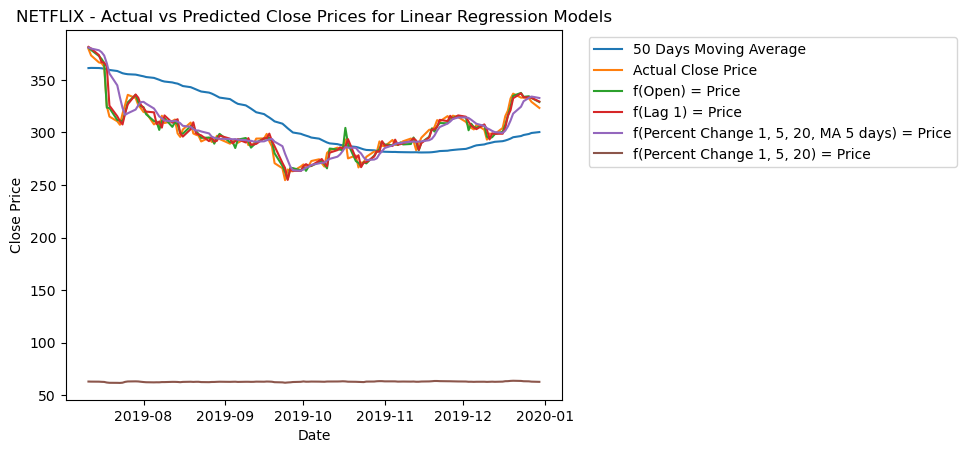

In [25]:
### NETFLIX - PLOT OF THE ACTUAL VS PREDICTED CLOSE PRICES FOR THE LINEAR REGRESSION MODELS
sns.lineplot(x = 'Date', y = 'MA 50 days', data = df_NFLX.iloc[-120:])
sns.lineplot(x = 'Date', y = 'Actual Close Price', data = NFLX_reg_predictions_df)
sns.lineplot(x = 'Date', y = 'NFLX LinearReg Model 1', data = NFLX_reg_predictions_df)
sns.lineplot(x = 'Date', y = 'NFLX LinearReg Model 2', data = NFLX_reg_predictions_df)
sns.lineplot(x = 'Date', y = 'NFLX LinearReg Model 3', data = NFLX_reg_predictions_df)
sns.lineplot(x = 'Date', y = 'NFLX LinearReg Model 4', data = NFLX_reg_predictions_df)
plt.legend(['50 Days Moving Average',
            'Actual Close Price',
        'f(Open) = Price', 
        'f(Lag 1) = Price', 
        'f(Percent Change 1, 5, 20, MA 5 days) = Price',
        'f(Percent Change 1, 5, 20) = Price'], 
           bbox_to_anchor=(1.04, 1),
           loc="upper left")
plt.title('NETFLIX - Actual vs Predicted Close Prices for Linear Regression Models')
plt.ylabel('Close Price')
plt.show()

## Part C - Classification Problem - Model Building 
Predicting the Direction of the Stock End of Today

In [26]:
def print_confusion_matrix(confusion_matrix):
    '''
    Function: Print Confusion Matrix with the values for 
    True Positive (TP), False Positive (FP), 
    False Negative (FN), True Negative (TN)
    
    Input: confusion_matrix (2 X 2 array)
    Convert confusion matrix into 1D array to extract the TP, FP, FN, TN
    
    '''
    tn, fp, fn, tp = confusion_matrix.ravel()
    print('-- Confusion Matrix --')
    print('TP: {0}'.format(tp),
         'FP:{0}'.format(fp),
         'FN: {0}'.format(fn),
         'TN: {0}'.format(tn))
    print('--------------------')
def calculate_precision(confusion_matrix):
    '''
    The ratio/percentage of positive correct predictions out of all positive predictions (predicted & actual)
    '''
    tn, fp, fn, tp = confusion_matrix.ravel()
    if tp == 0:
        return 0
    precision = tp/(tp + fp)
    return precision
def calculate_recall(confusion_matrix):
    '''
    The percentage of accurate actual positive predictions out of actual positives
    '''
    tn, fp, fn, tp= confusion_matrix.ravel()
    if tp == 0:
        return 0
    recall =  tp/(tp + fn )
    return recall
def calculate_f1score(confusion_matrix):
    '''
    f1 score - the measure of test's accuracy & weighted harmonic mean of the recall and precision
    '''
    precision = calculate_precision(confusion_matrix)
    recall = calculate_recall(confusion_matrix)
    if recall + precision == 0:
        return 0
    f1score = 2*(recall*precision)/(recall+precision)
    
    return f1score

In [27]:
def run_classification_model(stock_name, model, X_train_class, X_test_class, Y_train_class, Y_test_class, 
                             predictions_output_df,
                            model_performance_metrics_chart):
    print('#################', stock_name, model, '###################')

    model = model
    model.fit(X_train_class, Y_train_class)
    class_predictions = model.predict(X_test_class)

    ## Performance Metrics ##
    accuracyscore = accuracy_score(Y_test_class, class_predictions)
    print('Accuracy Score:', accuracyscore)
    ## Confusion Matrix
    confusionmatrix= confusion_matrix(Y_test_class, class_predictions) ## y_true, y_pred
    print(confusionmatrix)
    print_confusion_matrix(confusionmatrix)
    print('Classification Report')
    print(classification_report(Y_test_class, class_predictions))
    
    
    #### ADD PREDICTIONS TO PREDICTIONS OUTPUT DF for all models
    predictions_output_df[type(model).__name__] = class_predictions
    
    ### ADD model evaluation performance metrics to a summary chart
    model_performance_metrics_chart.loc[type(model).__name__, 'Accuracy Score'] = accuracyscore
    model_performance_metrics_chart.loc[type(model).__name__, 'Precision'] = calculate_precision(confusionmatrix)
    model_performance_metrics_chart.loc[type(model).__name__, 'Recall'] = calculate_recall(confusionmatrix)
    model_performance_metrics_chart.loc[type(model).__name__, 'F1 Score'] = calculate_f1score(confusionmatrix)


In [28]:
stock_name = 'WALMART'
# set x features and target label
x_features = ["Open", "Prev (Close-Open) % Change", "Lag 1", "Percent Change 1", "MA 5 days", "MA 20 days"]
target_label = 'Target'
## create X and Y datasets of the x features and y feature
X_class = df_WMT.set_index('Date')[x_features]
y_class = df_WMT.set_index('Date')[target_label]
## split X and Y into training and testing datasets where the test size is 20% of the dataset
X_train_class, X_test_class, Y_train_class, Y_test_class = create_training_test(X_class, y_class, 855)
## create a predictions output dataframe to store the predictions from every model
WMT_predictions_output_df = pd.DataFrame()
WMT_predictions_output_df['Date'] = X_test_class.index
WMT_predictions_output_df['Actual Target'] = Y_test_class.values
## create a performance metrics dataframe to store the classification evaluation metrics from every model
WMT_model_performance_metrics_chart = pd.DataFrame()
## LOGISTIC REGRESSION CLASSIFICATION MODEL
run_classification_model(stock_name, 
                         LogisticRegression(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        WMT_predictions_output_df,
                        WMT_model_performance_metrics_chart )
## Random Forest CLASSIFICATION MODEL
run_classification_model(stock_name, 
                         RandomForestClassifier(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        WMT_predictions_output_df,
                        WMT_model_performance_metrics_chart )
## K Nearest Neighbors CLASSIFICATION MODEL
run_classification_model(stock_name, 
                         KNeighborsClassifier(n_neighbors = 5), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        WMT_predictions_output_df,
                        WMT_model_performance_metrics_chart )
## SVM CLASSIFICATION MODEL
run_classification_model(stock_name, 
                         SVC(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        WMT_predictions_output_df,
                        WMT_model_performance_metrics_chart )
## GaussianNB CLASSIFICATION MODEL
run_classification_model(stock_name,
                         GaussianNB(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        WMT_predictions_output_df,
                        WMT_model_performance_metrics_chart )
## predictions table
WMT_predictions_output_df.tail(10)

################# WALMART LogisticRegression() ###################
Accuracy Score: 0.9953216374269006
[[387   3]
 [  1 464]]
-- Confusion Matrix --
TP: 464 FP:3 FN: 1 TN: 387
--------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       390
           1       0.99      1.00      1.00       465

    accuracy                           1.00       855
   macro avg       1.00      1.00      1.00       855
weighted avg       1.00      1.00      1.00       855

################# WALMART RandomForestClassifier() ###################
Accuracy Score: 1.0
[[390   0]
 [  0 465]]
-- Confusion Matrix --
TP: 465 FP:0 FN: 0 TN: 390
--------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      1.00      1.00       465

    accuracy                           1.00       855
   macro avg       1.00      1

,Date,Actual Target,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,SVC,GaussianNB
845,2019-12-16,1,1,1,0,0,0
846,2019-12-17,1,1,1,0,0,1
847,2019-12-18,0,0,0,0,0,0
848,2019-12-19,1,1,1,0,0,0
849,2019-12-20,1,1,1,0,0,0
850,2019-12-23,0,0,0,0,0,0
851,2019-12-24,1,1,1,0,0,1
852,2019-12-26,1,1,1,0,0,0
853,2019-12-27,1,1,1,0,0,0
854,2019-12-30,0,0,0,0,0,0


In [29]:
WMT_model_performance_metrics_chart

,Accuracy Score,Precision,Recall,F1 Score
LogisticRegression,0.995322,0.993576,0.997849,0.995708
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
KNeighborsClassifier,0.642105,0.824490,0.434409,0.569014
SVC,0.785965,0.929878,0.655914,0.769231
GaussianNB,0.946199,1.000000,0.901075,0.947964


In [30]:
stock_name = 'NETFLIX'
# set x features and target label
x_features = ["Open", "Prev (Close-Open) % Change", "Lag 1", "Percent Change 1", "MA 5 days", "MA 20 days"]
target_label = 'Target'
## create X and Y datasets of the x features and y feature
X_class = df_NFLX.set_index('Date')[x_features]
y_class = df_NFLX.set_index('Date')[target_label]
## split X and Y into training and testing datasets where the test size is 20% of the dataset
X_train_class, X_test_class, Y_train_class, Y_test_class = create_training_test(X_class, y_class, 855)
## create a predictions output dataframe to store the predictions from every model
NFLX_predictions_output_df = pd.DataFrame()
NFLX_predictions_output_df['Date'] = X_test_class.index
NFLX_predictions_output_df['Actual Target'] = Y_test_class.values
## create a performance metrics dataframe to store the classification evaluation metrics from every model
NFLX_model_performance_metrics_chart = pd.DataFrame()

## LOGISTIC REGRESSION CLASSIFICATION MODEL
run_classification_model(stock_name, 
                         LogisticRegression(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        NFLX_predictions_output_df,
                        NFLX_model_performance_metrics_chart )
## Random Forest CLASSIFICATION MODEL
run_classification_model(stock_name, 
                         RandomForestClassifier(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        NFLX_predictions_output_df,
                        NFLX_model_performance_metrics_chart )
## K Nearest Neighbors CLASSIFICATION MODEL
run_classification_model(stock_name, 
                         KNeighborsClassifier(n_neighbors = 5), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        NFLX_predictions_output_df,
                        NFLX_model_performance_metrics_chart )
## SVM CLASSIFICATION MODEL
run_classification_model(stock_name, 
                         SVC(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        NFLX_predictions_output_df,
                        NFLX_model_performance_metrics_chart )
## GaussianNB CLASSIFICATION MODEL
run_classification_model(stock_name,
                         GaussianNB(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        NFLX_predictions_output_df,
                        NFLX_model_performance_metrics_chart )
NFLX_predictions_output_df.tail(10)

################# NETFLIX LogisticRegression() ###################
Accuracy Score: 0.9894736842105263
[[417   0]
 [  9 429]]
-- Confusion Matrix --
TP: 429 FP:0 FN: 9 TN: 417
--------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       417
           1       1.00      0.98      0.99       438

    accuracy                           0.99       855
   macro avg       0.99      0.99      0.99       855
weighted avg       0.99      0.99      0.99       855

################# NETFLIX RandomForestClassifier() ###################
Accuracy Score: 0.9988304093567252
[[417   0]
 [  1 437]]
-- Confusion Matrix --
TP: 437 FP:0 FN: 1 TN: 417
--------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       417
           1       1.00      1.00      1.00       438

    accuracy                           1.00       855
   macro avg   

,Date,Actual Target,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,SVC,GaussianNB
845,2019-12-16,1,1,1,0,0,0
846,2019-12-17,1,1,1,0,0,0
847,2019-12-18,1,1,1,0,0,0
848,2019-12-19,1,1,1,0,0,0
849,2019-12-20,1,1,1,0,0,0
850,2019-12-23,0,0,0,0,0,0
851,2019-12-24,1,0,1,0,0,0
852,2019-12-26,0,0,0,0,0,0
853,2019-12-27,0,0,0,0,0,0
854,2019-12-30,0,0,0,0,0,0


In [31]:
### NETFLIX MODEL PERFORMANCE METRICS TABLE with accuracy score, precision, recall and f1 score for each model
NFLX_model_performance_metrics_chart

,Accuracy Score,Precision,Recall,F1 Score
LogisticRegression,0.989474,1.00,0.979452,0.989619
RandomForestClassifier,0.998830,1.00,0.997717,0.998857
KNeighborsClassifier,0.504094,0.64,0.073059,0.131148
SVC,0.512281,1.00,0.047945,0.091503
GaussianNB,0.500585,1.00,0.025114,0.048998


## PART D - CLASSIFICATION MODELING
PREDICTING THE DIRECTION OF THE STOCK TOMORROW

In [32]:
stock_name = 'WALMART'
## set x features and target label for training and testing sets
x_features = ["Lag 5", "Prev Percent Change 1", "Prev (Close-Open) % Change", "MA 5 days"]
target_label = 'Target tomorrow'
## create X and Y datasets with the stock data of the selected x features and target label column
X_class = df_WMT.set_index('Date')[x_features]
y_class = df_WMT.set_index('Date')[target_label]

##Split the X and Y datasets into training and testing data
X_train_class, X_test_class, Y_train_class, Y_test_class = create_training_test(X_class, y_class, 855)

## Create a prediction output dataframe to store all the predictions from each model
WMT_predictions_output_df_targettmr= pd.DataFrame()
WMT_predictions_output_df_targettmr['Date'] = X_test_class.index
WMT_predictions_output_df_targettmr['Actual Target'] = Y_test_class.values
## Create a performance metrics dataframe to store the model evaluation metrics for each model
WMT_model_performance_metrics_chart_targettmr = pd.DataFrame()
### CLASSIFICATION MODEL LOGISTIC REGRESSION
run_classification_model(stock_name, 
                         LogisticRegression(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        WMT_predictions_output_df_targettmr,
                        WMT_model_performance_metrics_chart_targettmr)

### CLASSIFICATION MODEL RANDOM FOREST CLASSIFIER
run_classification_model(stock_name, 
                         RandomForestClassifier(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        WMT_predictions_output_df_targettmr,
                        WMT_model_performance_metrics_chart_targettmr )

### CLASSIFICATION MODEL K NEAREST NEIGHBORS
run_classification_model(stock_name, 
                         KNeighborsClassifier(n_neighbors = 5), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        WMT_predictions_output_df_targettmr,
                        WMT_model_performance_metrics_chart_targettmr )

### CLASSIFICATION MODEL GAUSSIAN NAIVE BAYES
run_classification_model(stock_name,
                         GaussianNB(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        WMT_predictions_output_df_targettmr,
                        WMT_model_performance_metrics_chart_targettmr )
WMT_predictions_output_df_targettmr.tail(22)

################# WALMART LogisticRegression() ###################
Accuracy Score: 0.49005847953216375
[[264 126]
 [310 155]]
-- Confusion Matrix --
TP: 155 FP:126 FN: 310 TN: 264
--------------------
Classification Report
              precision    recall  f1-score   support

           0       0.46      0.68      0.55       390
           1       0.55      0.33      0.42       465

    accuracy                           0.49       855
   macro avg       0.51      0.51      0.48       855
weighted avg       0.51      0.49      0.48       855

################# WALMART RandomForestClassifier() ###################
Accuracy Score: 0.5087719298245614
[[238 152]
 [268 197]]
-- Confusion Matrix --
TP: 197 FP:152 FN: 268 TN: 238
--------------------
Classification Report
              precision    recall  f1-score   support

           0       0.47      0.61      0.53       390
           1       0.56      0.42      0.48       465

    accuracy                           0.51       855
   mac

,Date,Actual Target,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,GaussianNB
833,2019-11-27,1,0,0,0,0
834,2019-11-29,1,0,0,0,0
835,2019-12-02,0,0,1,0,0
836,2019-12-03,1,0,0,0,0
837,2019-12-04,0,0,0,0,0
838,2019-12-05,1,0,1,0,0
839,2019-12-06,0,0,0,0,0
840,2019-12-09,0,0,0,0,0
841,2019-12-10,0,0,1,0,0
842,2019-12-11,1,0,1,0,0


In [33]:
## WALMART - model performance evaluation metrics for each model classifying for Target tomorrow - market direction tmr
WMT_model_performance_metrics_chart_targettmr

,Accuracy Score,Precision,Recall,F1 Score
LogisticRegression,0.490058,0.551601,0.333333,0.415550
RandomForestClassifier,0.508772,0.564470,0.423656,0.484029
KNeighborsClassifier,0.502924,0.582645,0.303226,0.398868
GaussianNB,0.478363,0.525333,0.423656,0.469048


In [34]:
stock_name = 'NETFLIX'
## set x features and target label for training and testing sets
x_features = ["Lag 5", "Prev Percent Change 1", "Prev (Close-Open) % Change", "MA 5 days"]
target_label = 'Target tomorrow'
## create X and Y datasets with the stock data of the selected x features and target label column
X_class = df_NFLX.set_index('Date')[x_features]
y_class = df_NFLX.set_index('Date')[target_label]

##Split the X and Y datasets into training and testing data
X_train_class, X_test_class, Y_train_class, Y_test_class = create_training_test(X_class, y_class, 855)

## Create a prediction output dataframe to store all the predictions from each model
NFLX_predictions_output_df_targettmr= pd.DataFrame()
NFLX_predictions_output_df_targettmr['Date'] = X_test_class.index
NFLX_predictions_output_df_targettmr['Actual Target'] = Y_test_class.values

## Create a performance metrics dataframe to store the model evaluation metrics for each model
NFLX_model_performance_metrics_chart_targettmr = pd.DataFrame()

### CLASSIFICATION MODEL LOGISTIC REGRESSION
run_classification_model(stock_name, 
                         LogisticRegression(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        NFLX_predictions_output_df_targettmr,
                        NFLX_model_performance_metrics_chart_targettmr)

### CLASSIFICATION MODEL RANDOM FOREST CLASSIFIER
run_classification_model(stock_name, 
                         RandomForestClassifier(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        NFLX_predictions_output_df_targettmr,
                        NFLX_model_performance_metrics_chart_targettmr )

### CLASSIFICATION MODEL K NEAREST NEIGHBORS
run_classification_model(stock_name, 
                         KNeighborsClassifier(n_neighbors = 5), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        NFLX_predictions_output_df_targettmr,
                        NFLX_model_performance_metrics_chart_targettmr )

### CLASSIFICATION MODEL GAUSSIAN NAIVE BAYES
run_classification_model(stock_name,
                         GaussianNB(), 
                         X_train_class, X_test_class, Y_train_class, Y_test_class,
                        NFLX_predictions_output_df_targettmr,
                        NFLX_model_performance_metrics_chart_targettmr )
NFLX_predictions_output_df_targettmr.tail(22)

################# NETFLIX LogisticRegression() ###################
Accuracy Score: 0.48771929824561405
[[417   0]
 [438   0]]
-- Confusion Matrix --
TP: 0 FP:0 FN: 438 TN: 417
--------------------
Classification Report
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       417
           1       0.00      0.00      0.00       438

    accuracy                           0.49       855
   macro avg       0.24      0.50      0.33       855
weighted avg       0.24      0.49      0.32       855

################# NETFLIX RandomForestClassifier() ###################
Accuracy Score: 0.52046783625731
[[121 296]
 [114 324]]
-- Confusion Matrix --
TP: 324 FP:296 FN: 114 TN: 121
--------------------
Classification Report
              precision    recall  f1-score   support

           0       0.51      0.29      0.37       417
           1       0.52      0.74      0.61       438

    accuracy                           0.52       855
   macro avg

,Date,Actual Target,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,GaussianNB
833,2019-11-27,0,0,1,0,0
834,2019-11-29,0,0,1,0,0
835,2019-12-02,0,0,1,0,0
836,2019-12-03,0,0,1,0,0
837,2019-12-04,0,0,1,0,0
838,2019-12-05,1,0,1,0,0
839,2019-12-06,0,0,1,0,0
840,2019-12-09,0,0,1,0,0
841,2019-12-10,1,0,1,0,0
842,2019-12-11,0,0,0,0,0


In [35]:
## NETFLIX - performance metrics for each model classifying for market direction tomorrow
NFLX_model_performance_metrics_chart_targettmr

,Accuracy Score,Precision,Recall,F1 Score
LogisticRegression,0.487719,0.000000,0.000000,0.000000
RandomForestClassifier,0.520468,0.522581,0.739726,0.612476
KNeighborsClassifier,0.492398,0.541667,0.059361,0.106996
GaussianNB,0.488889,1.000000,0.002283,0.004556


## SHOULD WE INVEST TODAY FOR WALMART AND NETFLIX?

#Market is just opened. We have to decide to buy WALMART and/or NETFLIX stocks or not.

In [36]:
## initialize variables for testing dates
prev_date = '2019-11-29'
today_date = '2019-12-02'
tomorrow_date = '2019-12-03'

In [37]:
print("##################WALMART##################")
print('Actual Close Price')
print(WMT_reg_predictions_df[WMT_reg_predictions_df['Date'].isin([prev_date, today_date, tomorrow_date])].set_index(
    'Date')['Actual Close Price'])
print("##############")
print('Predicted Close Price')
display(WMT_reg_predictions_df[WMT_reg_predictions_df['Date'].isin([prev_date,
    today_date, 
    tomorrow_date])].set_index('Date')[[
    'WMT LinearReg Model 1',
    'WMT LinearReg Model 2',
    'WMT LinearReg Model 3']].mean(axis = 1))

print("##############")
print("Actual Data for Previous Day, Current Day, and Next Day")
display(df_WMT[df_WMT['Date'].isin([prev_date,today_date, tomorrow_date])][['Date', 'Open', 'Close',
                                                                              'MA 5 days', 'Percent Change 1', 'Diff 1', 'Target tomorrow']])
print("##############")
print("Target Predictions for Today's Stock Market Direction")
display(WMT_predictions_output_df[WMT_predictions_output_df['Date'] == today_date])
print("##############")
print("Target Predictions for Tomorrow's Stock Market Direction")
display(WMT_predictions_output_df_targettmr[WMT_predictions_output_df_targettmr['Date'] == today_date])
print('#################################################')

##################WALMART##################
Actual Close Price
Date
2019-11-29    119.089996
2019-12-02    119.279999
2019-12-03    118.669998
Name: Actual Close Price, dtype: float64
##############
Predicted Close Price


Date
2019-11-29    119.028492
2019-12-02    119.137562
2019-12-03    118.862112
dtype: float64

##############
Actual Data for Previous Day, Current Day, and Next Day


,Date,Open,Close,MA 5 days,Percent Change 1,Diff 1,Target tomorrow
4257,2019-11-29,119.139999,119.089996,119.218001,0.277866,0.329994,1
4258,2019-12-02,119.150002,119.279999,119.064000,0.159546,0.190003,0
4259,2019-12-03,118.400002,118.669998,119.047999,-0.511403,-0.610001,1


##############
Target Predictions for Today's Stock Market Direction


,Date,Actual Target,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,SVC,GaussianNB
835,2019-12-02,1,1,1,0,0,0


##############
Target Predictions for Tomorrow's Stock Market Direction


,Date,Actual Target,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,GaussianNB
835,2019-12-02,0,0,1,0,0


#################################################


In [38]:
print("##################NETFLIX##################")
print('Actual Close Price')
print(NFLX_reg_predictions_df[NFLX_reg_predictions_df['Date'].isin([prev_date,today_date, tomorrow_date])].set_index(
    'Date')['Actual Close Price'])
print("##############")
print('Predicted Close Price')
display(NFLX_reg_predictions_df[NFLX_reg_predictions_df['Date'].isin([prev_date,
    today_date, 
    tomorrow_date])].set_index('Date')[[
    'NFLX LinearReg Model 1',
    'NFLX LinearReg Model 2',
    'NFLX LinearReg Model 3']].mean(axis = 1))

print("##############")
print("Actual Data for Previous Day, Current Day, and Next Day")
display(df_NFLX[df_NFLX['Date'].isin([prev_date,today_date, tomorrow_date])][['Date', 'Open', 'Close',
                                                                              'MA 5 days', 'Percent Change 1', 'Diff 1']])
print("##############")
print("Target Predictions for Today's Stock Market Direction")
display(NFLX_predictions_output_df[NFLX_predictions_output_df['Date'] == today_date])
print("##############")
print("Target Predictions for Tomorrow's Stock Market Direction")
display(NFLX_predictions_output_df_targettmr[NFLX_predictions_output_df_targettmr['Date'] == today_date])
print('#################################################')

##################NETFLIX##################
Actual Close Price
Date
2019-11-29    314.660004
2019-12-02    309.989990
2019-12-03    306.160004
Name: Actual Close Price, dtype: float64
##############
Predicted Close Price


Date
2019-11-29    315.335899
2019-12-02    314.506256
2019-12-03    308.695444
dtype: float64

##############
Actual Data for Previous Day, Current Day, and Next Day


,Date,Open,Close,MA 5 days,Percent Change 1,Diff 1
4257,2019-11-29,315.779999,314.660004,313.227997,-0.401984,-1.269989
4258,2019-12-02,314.390015,309.989990,313.821997,-1.484146,-4.670014
4259,2019-12-03,302.220001,306.160004,313.723993,-1.235519,-3.829986


##############
Target Predictions for Today's Stock Market Direction


,Date,Actual Target,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,SVC,GaussianNB
835,2019-12-02,0,0,0,0,0,0


##############
Target Predictions for Tomorrow's Stock Market Direction


,Date,Actual Target,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,GaussianNB
835,2019-12-02,0,0,1,0,0


#################################################


## Result

Hypothetically, on December 2, 2019, we make a decision to invest or not to invest in Walmart and/or Netflix based on the predictions from the machine learning models.

    Walmart: The stock price is predicted to increase from previous price today, and the stock is predicted to decrease tomorrow so from the predictions, do not invest.

    Netflix: The stock price is predicted to decrease from previous price today, and the stock is predicted to decrease tomorrow so from the predictions, do not invest.